<font color='orange'><h1><center>Case Study: Credit EDA</center></h1></font>

### Import Libraries

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings('ignore')

### Reading the datasets

In [134]:
path=os.getcwd()
application=pd.read_csv(path+r"\application_data.csv")
previous=pd.read_csv(path+r"\previous_application.csv")

### General Checks on Data

In [135]:
# Info of the data.
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [136]:
# Look at the head of the data.
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
# Look at the column of the data.
application.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [138]:
# Summary statistics of the data.
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [139]:
# Look at the shape of the dataframe.
application.shape

(307511, 122)

### Calculate the NULL Values

<p style="font-family: Arial; font-size:1.0em;color:blue;">  Null values in the dataframe will effect the analysis and will not be helpful in securing the accurate results. So, we first count the percentage of Null values in each column of the dataframe and deleting the desired based on futher analyis. </p>

In [140]:
# Get the percentage of null/missing values.
round(application.isnull().sum()*100/len(application.index),2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

### Drop the columns

<p style="font-family: Arial; font-size:1.0em;color:blue;">We decided to drop the columns in the application dataframe whose null values are greater than 45 percent.</p>

In [141]:
a_col=application.columns[application.isnull().mean()>0.45]

In [142]:
application= application.drop(a_col, axis = 1)
print(application.shape)

(307511, 73)


<p style="font-family: Arial; font-size:1.0em;color:blue;">By Analysing the application dataframe, we decided to drop the following columns as they might not impact the bank in providing the loan to the customers</p>

In [143]:
application=application.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_EMP_PHONE',
                              'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 
                              'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
                              'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 
                              'ORGANIZATION_TYPE', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 
                              'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'], axis=1)
print(application.shape)

(307511, 52)


In [144]:
# Let's check if the columns are dropped successfully.
application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
  

In [145]:
# Lets's check the dtype of the columns.
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
SK_ID_CURR                    307511 non-null int64
TARGET                        307511 non-null int64
NAME_CONTRACT_TYPE            307511 non-null object
CODE_GENDER                   307511 non-null object
CNT_CHILDREN                  307511 non-null int64
AMT_INCOME_TOTAL              307511 non-null float64
AMT_CREDIT                    307511 non-null float64
AMT_ANNUITY                   307499 non-null float64
AMT_GOODS_PRICE               307233 non-null float64
NAME_TYPE_SUITE               306219 non-null object
NAME_INCOME_TYPE              307511 non-null object
NAME_EDUCATION_TYPE           307511 non-null object
NAME_FAMILY_STATUS            307511 non-null object
NAME_HOUSING_TYPE             307511 non-null object
REGION_POPULATION_RELATIVE    307511 non-null float64
DAYS_BIRTH                    307511 non-null int64
DAYS_EMPLOYED                 307511 non

<p style="font-family: Arial; font-size:1.0em;color:blue;">After dropping the unwanted columns, the dataframe has the columns with the required datatypes. So, there is no necessity in changing the datatypes of the columns.

### Impute the missing values -- Only Analysis

In [146]:
# Let's check the null value percentage.
round(application.isnull().sum()*100/len(application.index),2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_CONT_MOBILE               0.00
FLAG_EMAIL                     0.00
OCCUPATION_TYPE               31.35
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
DAYS_LAST_PHONE_CHANGE         0.00
FLAG_DOCUMENT_2                0.00
FLAG_DOCUMENT_3             

In [147]:
# Get the value counts for 'OCCUPATION_TYPE'
application['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

<p style="font-family: Arial; font-size:1.0em;color:blue;">Analysis -  Since 'OCCUPATION_TYPE' is a categorical column, it's best to impute with mean of the column i.e., 'Laborers' in this case.

`application.loc[pd.isnull(application['OCCUPATION_TYPE']), ['OCCUPATION_TYPE']] = "Laborers"`

<p style="font-family: Arial; font-size:1.0em;color:blue;"> Also, we observe there are around 13 percent of null values in the following columns. Let's perform analysis on them.<br><br>
1. AMT_REQ_CREDIT_BUREAU_HOUR <br>
2. AMT_REQ_CREDIT_BUREAU_DAY<br> 
3. AMT_REQ_CREDIT_BUREAU_WEEK<br>
4. AMT_REQ_CREDIT_BUREAU_MON<br>
5. AMT_REQ_CREDIT_BUREAU_QRT<br>
6. AMT_REQ_CREDIT_BUREAU_YEAR<br>

In [148]:
# Get the value counts for 'AMT_REQ_CREDIT_BUREAU_HOUR'
application['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

<p style="font-family: Arial; font-size:1.0em;color:blue;">Analysis - '0' is the most commonly occuring value. It is best to impute the missing values with '0'

`application.loc[pd.isnull(application['AMT_REQ_CREDIT_BUREAU_HOUR']), ['AMT_REQ_CREDIT_BUREAU_HOUR']] = "0"`

In [149]:
# Get the value counts for 'AMT_REQ_CREDIT_BUREAU_DAY'
application['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

<p style="font-family: Arial; font-size:1.0em;color:blue;">Analysis - '0' is the most commonly occuring value. It is best to impute the missing values with '0'

`application.loc[pd.isnull(application['AMT_REQ_CREDIT_BUREAU_DAY']), ['AMT_REQ_CREDIT_BUREAU_DAY']] = "0"`

In [150]:
# Get the value counts for 'AMT_REQ_CREDIT_BUREAU_WEEK'
application['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

<p style="font-family: Arial; font-size:1.0em;color:blue;">Analysis - '0' is the most commonly occuring value. It is best to impute the missing values with '0'

`application.loc[pd.isnull(application['AMT_REQ_CREDIT_BUREAU_WEEK']), ['AMT_REQ_CREDIT_BUREAU_WEEK']] = "0"`

In [151]:
# Get the value counts for 'AMT_REQ_CREDIT_BUREAU_MON'
application['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

<p style="font-family: Arial; font-size:1.0em;color:blue;">Analysis - '0' is the most commonly occuring value. It is best to impute the missing values with '0'

`application.loc[pd.isnull(application['AMT_REQ_CREDIT_BUREAU_MON']), ['AMT_REQ_CREDIT_BUREAU_MON']] = "0"`

<p style="font-family: Arial; font-size:1.0em;color:blue;">From the application dataframe, TARGET variable is the key variable on which we will do the analysis as it describes the payment difficulties that the customer is facing.<br><br>1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample<br>0 - all other cases

### Outliers Analysis and Treatment

<p style="font-family: Arial; font-size:1.0em;color:blue;">For 4 attributes (AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE), we analyze if there are any outliers.<br><br>Box plot gives the best depiction of the outliers in the data and it will be easy to visualize the outliers with the help of whiskers.

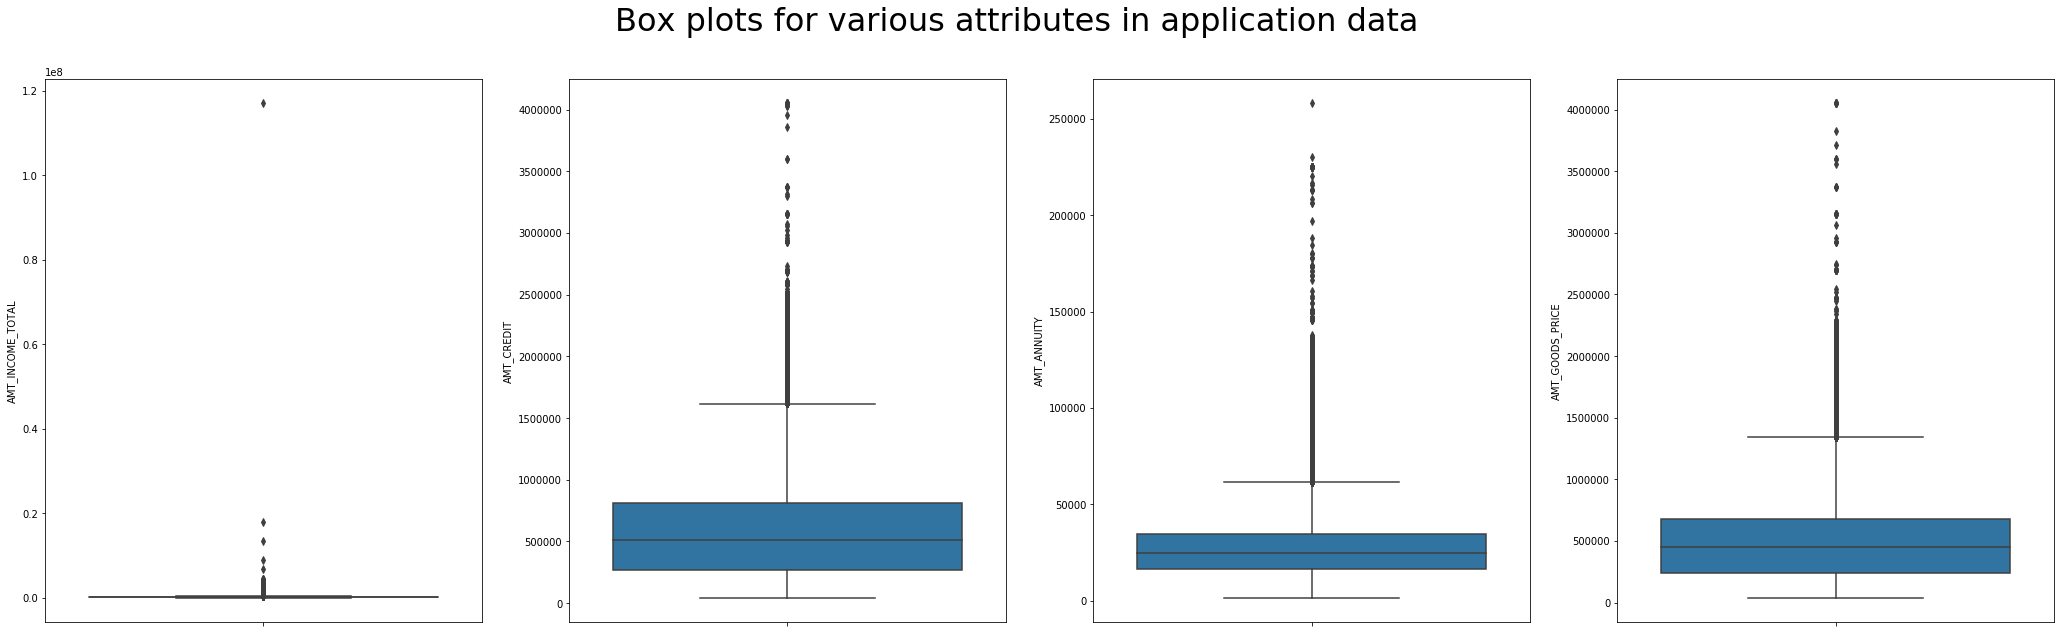

In [153]:
columns_to_remove_outliers=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
fig, axes = plt.subplots(1, len(columns_to_remove_outliers), figsize=(36,10))
for column, ax in zip(columns_to_remove_outliers,range(len(columns_to_remove_outliers))):
    ax=sns.boxplot(y=application[column],ax=axes[ax])
plt.suptitle("Box plots for various attributes in application data",fontsize=32)
plt.show()

figure = ax.get_figure()    

<p style="font-family: Arial; font-size:1.0em;color:blue;">The above distribution of outliers for the respective target is shown below

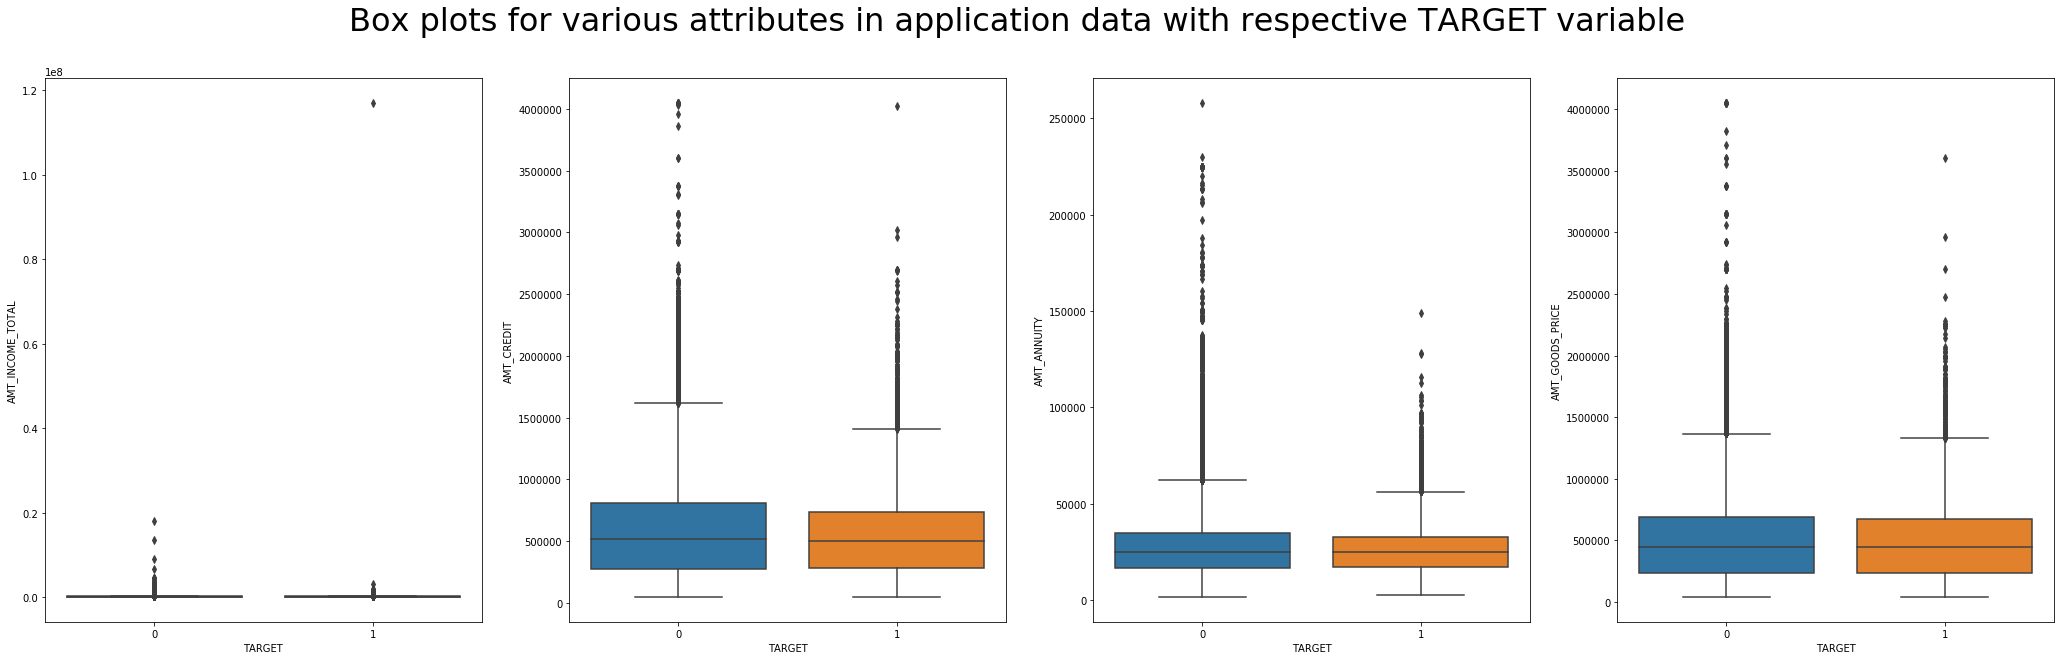

In [154]:
j=1
plt.figure(figsize=(36,10))
for i in columns_to_remove_outliers:
    plt.subplot(1,4,j)
    sns.boxplot(x="TARGET", y=i, data = application)
    j=j+1
plt.suptitle("Box plots for various attributes in application data with respective TARGET variable",fontsize=32)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;">It is clear from the above plots that there are outliers in the data. This will effect the data while analyzing and doesn't provide accurate results.<br>So, inorder to overcome the problem of outliers, we create the 2 quantiles q1 and q2 for 25th and 75th percentile and find the interquantile range iqr.<br>Then, we consider the dataframe with all the rows greater than l=(q1-1.5*iqr) and less than h=(q1+1.5*iqr)<br> All the values which has the values greater than l and h are considered as the outliers and are dropped out from the dataframe.</p>

In [155]:
# Create a function for removing the outliers.
def remove_outlier(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    l  = q1-1.5*iqr
    h = q3+1.5*iqr
    previous_out = df[~((df[col_name] < l) | (df[col_name] > h)).any(axis=1)]
    return previous_out

In [156]:
# Remove the outliers.
application=remove_outlier(application,columns_to_remove_outliers)

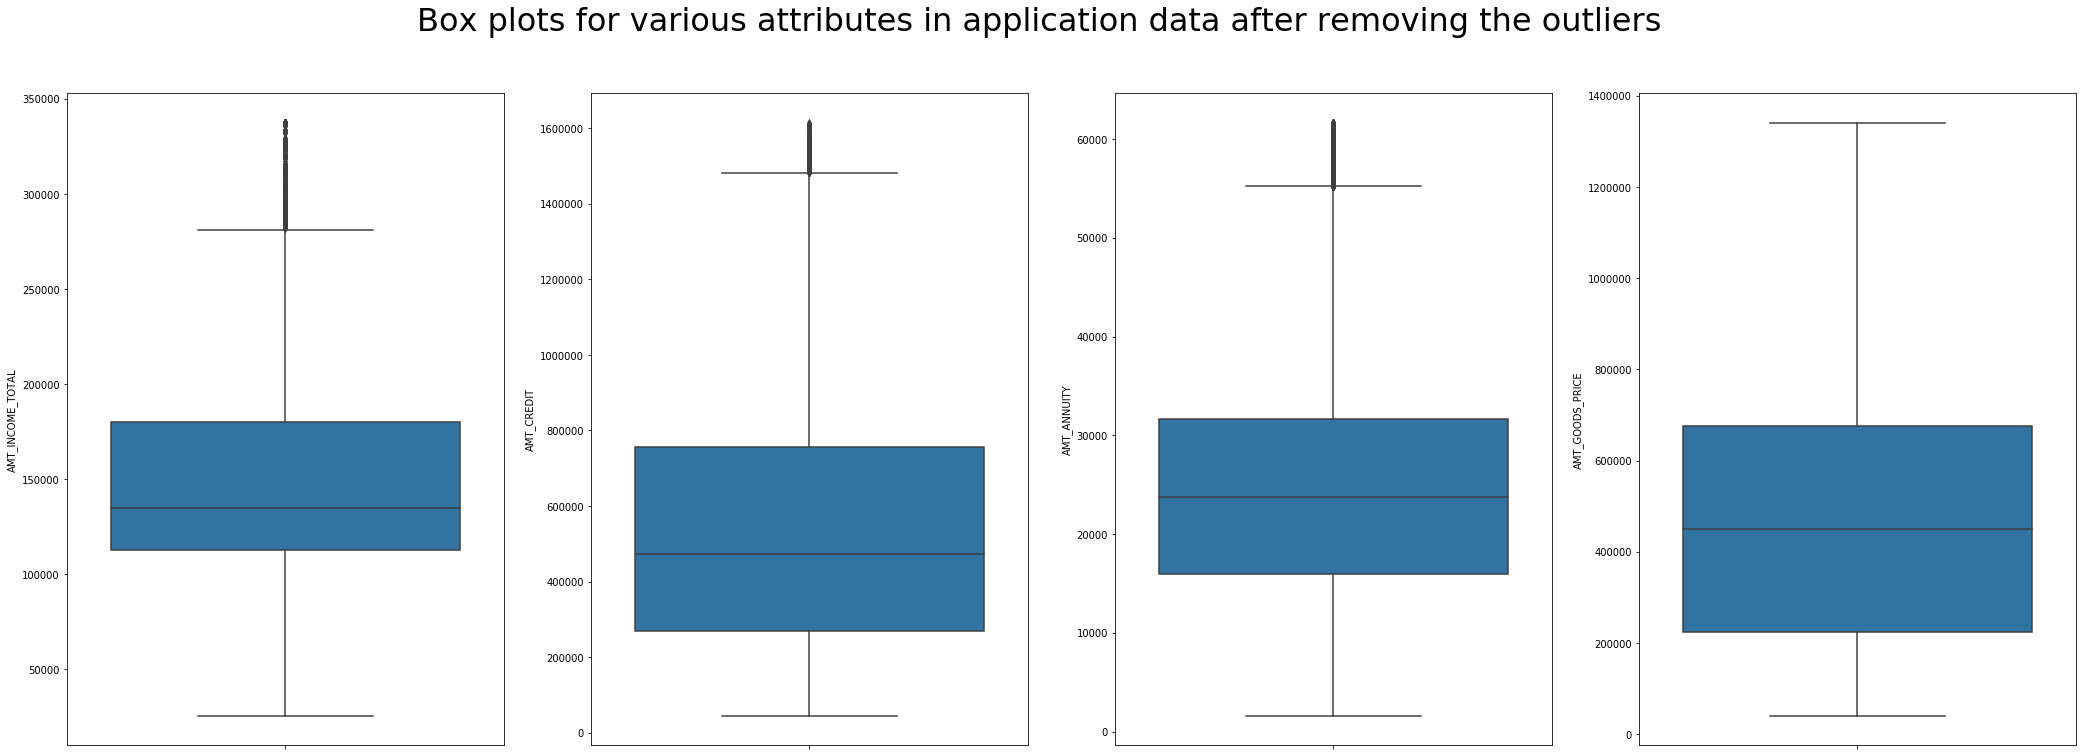

In [157]:
# Let's see the difference in plots.
fig, axes = plt.subplots(1, len(columns_to_remove_outliers), figsize=(36,12))
for column, ax in zip(columns_to_remove_outliers,range(len(columns_to_remove_outliers))):
    sns.boxplot(y=application[column],ax=axes[ax])
plt.suptitle("Box plots for various attributes in application data after removing the outliers",fontsize=32)
plt.show()

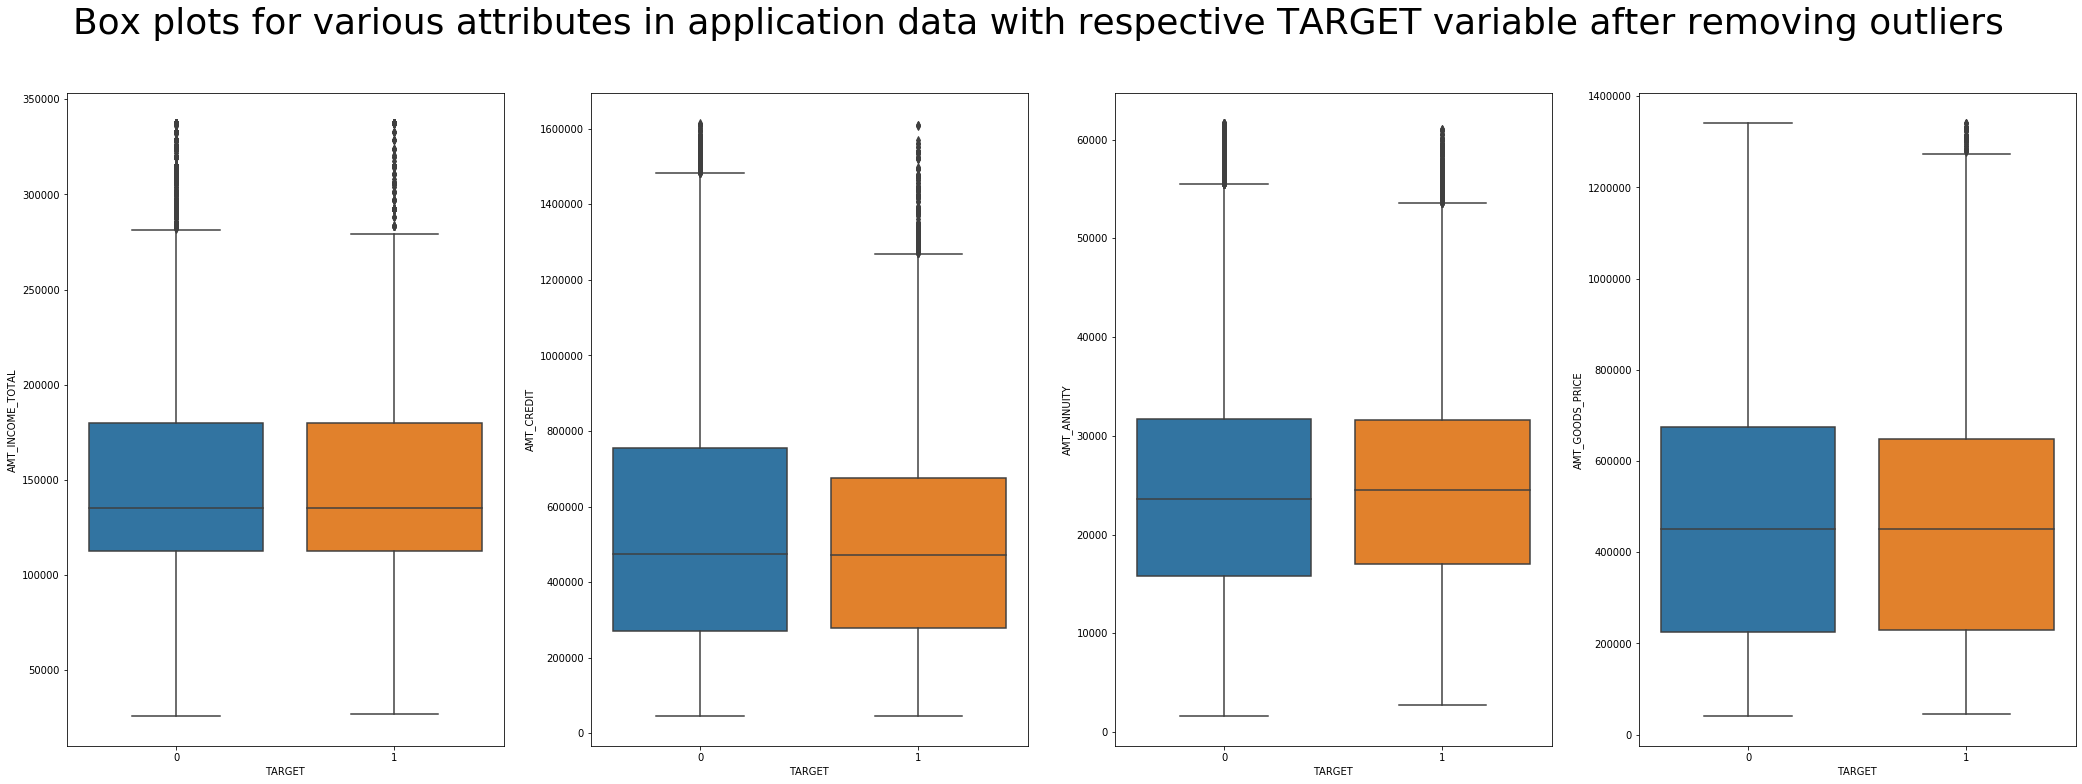

In [158]:
j=1
plt.figure(figsize=(36,12))
for i in columns_to_remove_outliers:
    plt.subplot(1,4,j)
    sns.boxplot(x="TARGET", y=i, data = application)
    j=j+1
plt.suptitle("Box plots for various attributes in application data with respective TARGET variable after removing outliers",fontsize=36)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;">After removing the outliers in all the columns, the boxplot looks much clean and sensible providing the insights of the features across the Targets 0 and 1 .</p>

### Binning of Continuous Variables

<p style="font-family: Arial; font-size:1.0em;color:blue;"> Binning is a good method to convert the continous variable to categorical variable.<br>Here we have selected 3 continous variables ('amt_income_bins','credit_amount_bins','AGE_bins') and binned them accordingly.

In [159]:
# Binning of 'credit_amount_bins'
bins=[0,500000,1000000,1500000,2000000,2500000,3000000,4000000]
label=['0-500000','500000-1000000','1000000-1500000','1500000-2000000','2000000-2500000','2500000-3000000','3000000-4000000']
application['credit_amount_bins']=pd.cut(application['AMT_CREDIT'],bins,labels=label)

In [160]:
# Binning of 'amt_income_bins'
bins=[0,50000,100000,150000,200000,250000,300000,400000,500000]
label=['0-50000','50000-100000','100000-150000','150000-200000','200000-250000','250000-300000','300000-400000','400000-500000']
application['amt_income_bins']=pd.cut(application['AMT_INCOME_TOTAL'],bins,labels=label)

In [161]:
# Binning of 'AGE'
application['AGE']=application['DAYS_BIRTH']*-1/365
application['AGE']
bins=[0,10,20,30,40,50,60,70,100]
label=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-100']
application['AGE_bins']=pd.cut(application['AGE'],bins,labels=label)

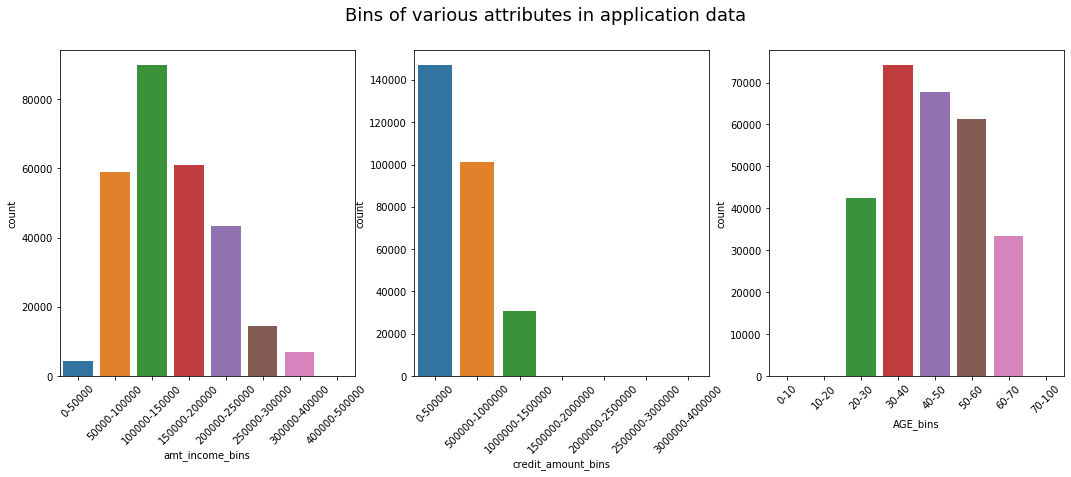

In [162]:
# Plot the bins.
j=0
fig, axes = plt.subplots(1, 3, figsize=(18,6))
c_bins=['amt_income_bins','credit_amount_bins','AGE_bins']
for i in c_bins:
    f = sns.countplot(i,ax=axes[j],data=application)
    f.set_xticklabels(f.get_xticklabels(), rotation=45)
    j=j+1
plt.suptitle('Bins of various attributes in application data',fontsize=18)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;">Below are the insights from the binning of the continous variables:<br>
    1. Customers with income between 100000 - 150000 are more than anyother income group.<br>
    2. People in the age group of 30 - 40 have applied for loan more than any other age group.<br>
    3. Credit amount of most of the customers are in the range of 0 - 500000
    

<p style="font-family: Arial; font-size:1.0em;color:blue;">Let's check the distribution of 'TARGET' variable. <br>Below graph determines that the data is not uniformly distributed across 0 and 1.

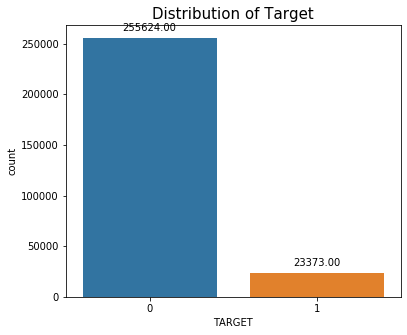

In [163]:
plt.figure(figsize=(6,5))
plt.title('Distribution of Target',fontsize=15)
ax=sns.countplot(application.TARGET)

# Annote with values.
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.tight_layout
plt.show()


<p style="font-family: Arial; font-size:1.0em;color:blue;">Analysis - Huge data imbalance exists between the 'TARGET' variable.

### Check the data imbalance

In [164]:
x=application['TARGET'].value_counts()
print('Total number of rows with Target 0 :',x[0])
print('Total number of rows with Target 1 :',x[1])
y=round(100*application['TARGET'].value_counts(normalize=True),2)
print('Total percentage of rows with Target 0 :',y[0])
print('Total percentage of rows with Target 1 :' ,y[1])

Total number of rows with Target 0 : 255624
Total number of rows with Target 1 : 23373
Total percentage of rows with Target 0 : 91.62
Total percentage of rows with Target 1 : 8.38


<p style="font-family: Arial; font-size:1.0em;color:blue;"> There are 255624 rows with Target 0 and 23373 for Target 1<br>i.e. 91.62 percent of the total rows determine the payment dfiificulties of the customers with target 0 and 8.38 percent of that for Target 1. </p>

<p style="font-family: Arial; font-size:1.0em;color:blue;"> This is huge Data imbalance.<br>

<p style="font-family: Arial; font-size:1.0em;color:blue;"> Dividing the dataframe based on the target values.

In [165]:
app0=application.loc[application['TARGET']==0]
app1=application.loc[application['TARGET']==1]
app_cat0=app0.loc[:,app0.dtypes==np.object]
app_cat1=app1.loc[:,app1.dtypes==np.object]

<p style="font-family: Arial; font-size:1.0em;color:blue;"> We will be performing the  analysis on the data.They are:<br><br><b>1. Univariate Analysis:</b><br>(a)Categorical Variables<br>(b)Numerical Variables<br><br><b>2. Bivariate Analysis:</b><br>(a)Numerical and Categorical Variables<br>(b)Numerical Variables

<font color='Green'><h2><center>Univariate Analysis: Target '0'</center></h2></font>

### Categorical Variables

<p style="font-family: Arial; font-size:1.0em;color:blue;">First we create a dataframe which has only the categorical features in the original dataframe using <b>numpy.object</b> method.<br>Instead of plotting the graph for each categorical variable, we ran the for loop for every categorical column in the dataframe.

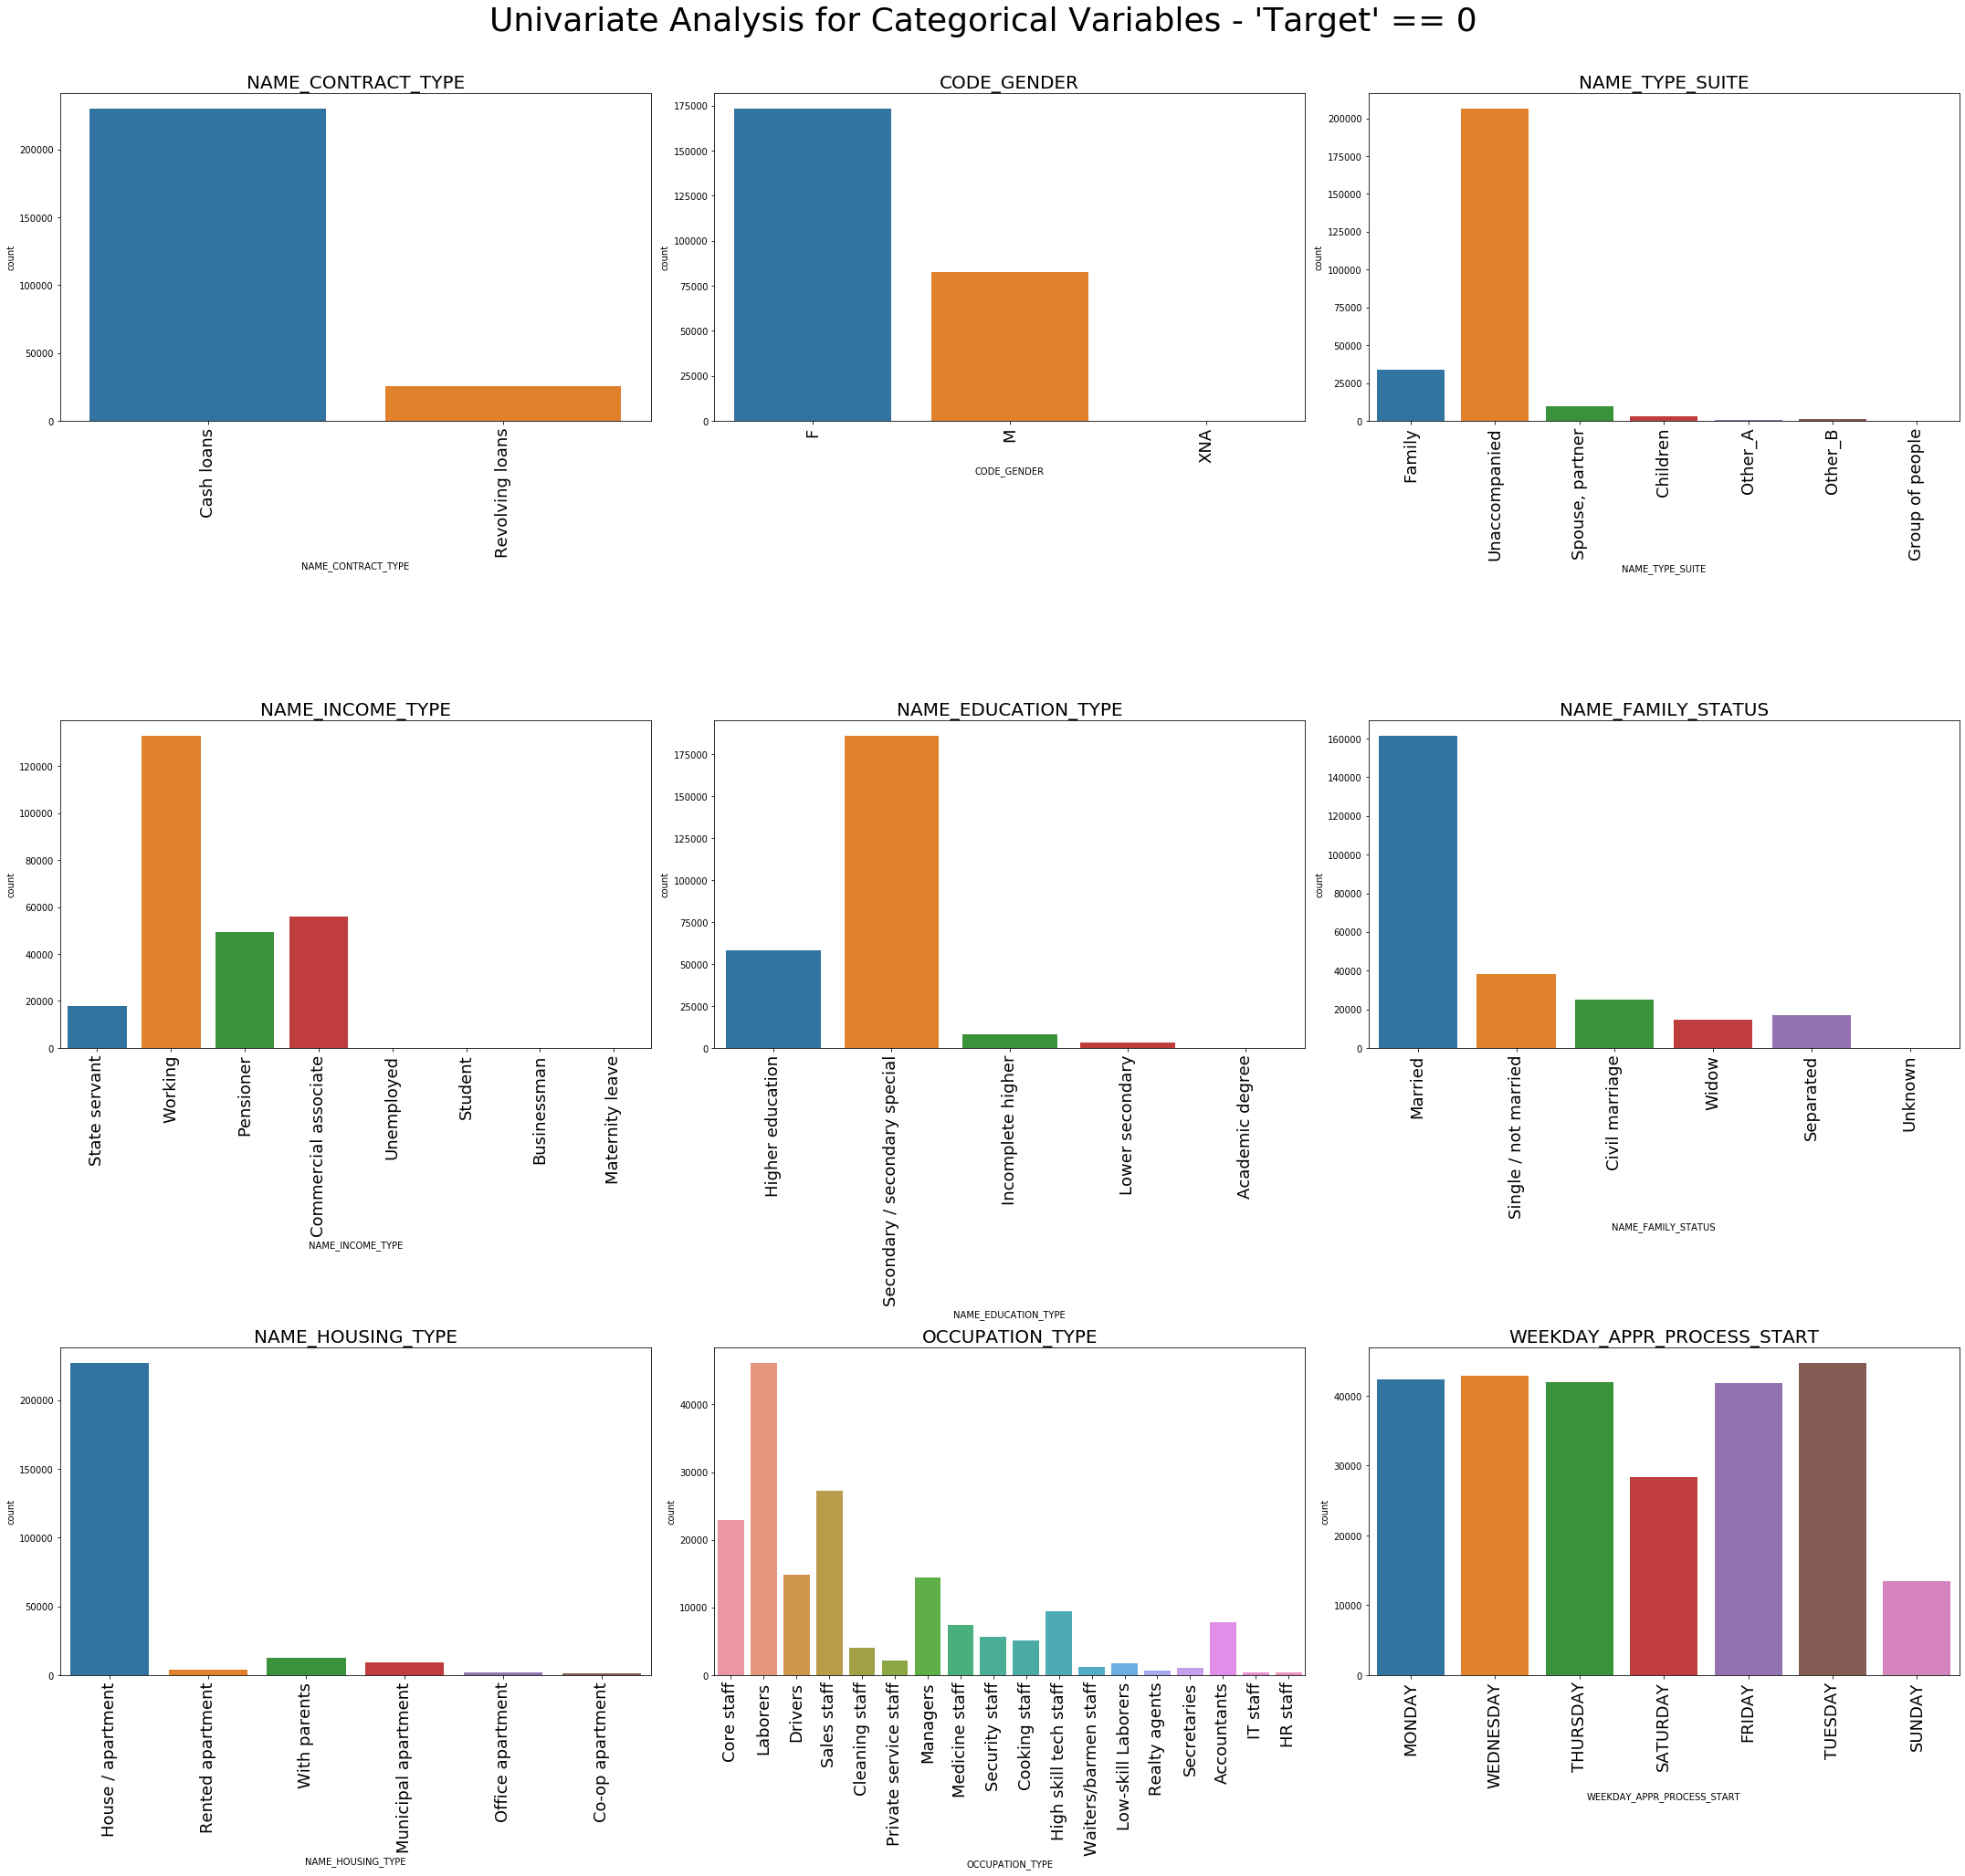

In [166]:
appcat=[]
for i in app_cat0.columns:
    appcat.append(i)
j=1
plt.figure(figsize=(30,30))
for i in appcat:
    plt.subplot(3,3,j)
    sns.countplot(i,data=app_cat0)
    plt.title(i,fontsize=20)
    plt.xticks(rotation=90,fontsize=18)
    j=j+1
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Univariate Analysis for Categorical Variables - \'Target\' == 0',fontsize=36)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;">The above plot depicts how each category is distributed among its subcategories for <b>Target 0</b>. Few of the observations are depicted below.<br> 1. Customers with target 0 have applied for more Cash loans when compared to revolving loans<br>2. For Target 0, Female customers are more in number than that of Male customers.<br>3. Based on the Income type, Working professionals are more in number when compared to the other subcategories.<br>4. Most of the clients applied Loan on Tuesday.<br>5. Most of the clients are married. 

### Numerical Variables

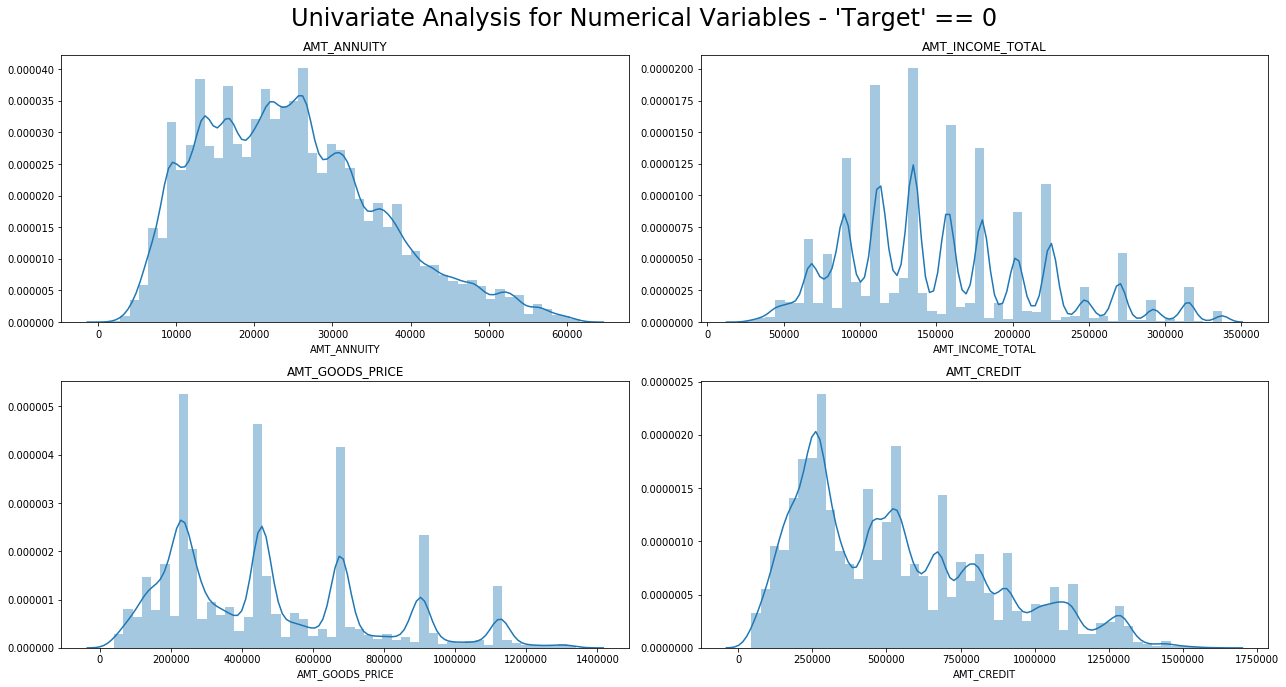

In [167]:
col=['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','AMT_CREDIT']
j=1
app0.dropna(subset=col,inplace=True)
plt.figure(figsize=(18,10))
for i in col:
    plt.subplot(2,2,j)
    plt.title(i,fontsize=12)
    sns.distplot(app0[i])
    j=j+1
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Univariate Analysis for Numerical Variables - \'Target\' == 0',fontsize=24)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;">Analysis -<br>
    1. High values of 'AMT_ANNUITY' are concentrated between 10000 - 30000<br>
    2. High values of 'AMT_INCOME_TOTAL' are concentrated between 100000 - 150000<br>
    3. Decreasing trend is seen in 'AMT_GOODS_PRICE' and 'AMT_CREDIT' attibutes.

<font color='Green'><h2><center>Bivariate Analysis: Target '0'</center></h2></font>

### Correlation

<p style="font-family: Arial; font-size:1.0em;color:blue;">Correlating the continous numerical columns in the dataframe gives the insights among the features. <br>For any two features x and y, if y and x change in the same direction, then the coorelation coefficient lies between 0 and 1<br>if both change in the opposite direction, then the correlation coefficient lies between -1 and 0. 

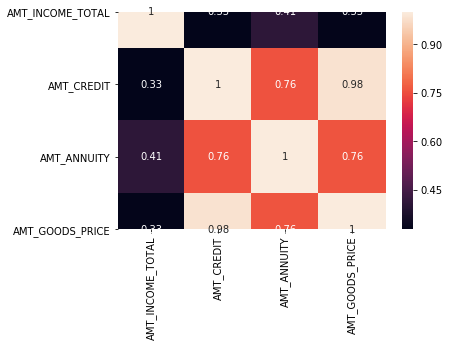

In [168]:
z=['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
fig=sns.heatmap(app0[z].corr(),annot=True)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;">From the above heatmap, we can determine that the coorelation between AMT_GOODS_PRICE and AMT_CREDIT is 0.98 which depicts that both are the features are following a very good linear relationship.<br>Similary, from the heatmap, below are the features which have correlated nicely.<br>1. AMT_CREDIT and AMT_GOODS_PRICE -    0.98<br>2. AMT_CREDIT and AMT_ANNUITY -    0.76<br>3. AMT_ANNUITY and AMT_GOODS_PRICE -   0.76<br>4. AMT_ANNUITY and AMT_INCOME_TOTAL -   0.41<br>5. AMT_INCOME_TOTAL and AMT_GOODS_PRICE -    0.33<br>6. AMT_INCOME_TOTAL and AMT_CREDIT -   0.33<br>

<p style="font-family: Arial; font-size:1.0em;color:blue;">So, we consider the below features as the 5 most important features.<br>1. AMT_CREDIT<br>2. AMT_GOODS_PRICE<br>3. AMT_ANNUITY <br>4. AMT_INCOME_TOTAL<br>

### Numerical and Categorical Variables

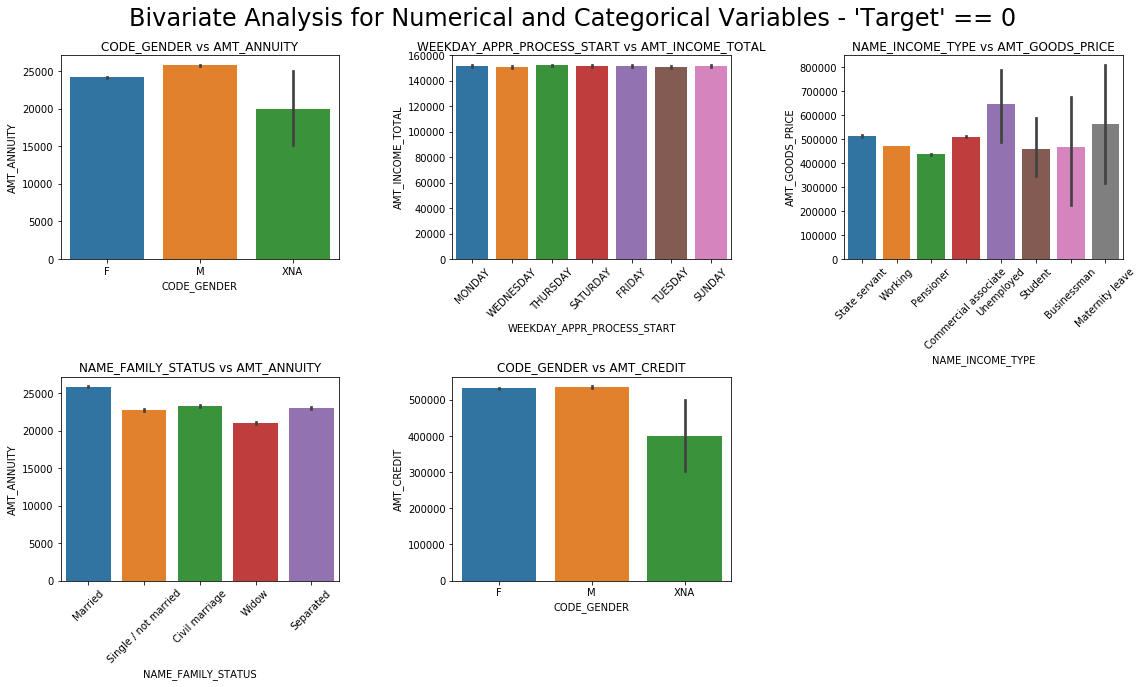

In [169]:
plt.figure(figsize=(16,10))
plt.subplot(231)
plt.title('CODE_GENDER vs AMT_ANNUITY',fontsize=12)
sns.barplot(y='AMT_ANNUITY',x='CODE_GENDER', data=app0)
plt.subplot(232)
plt.title('WEEKDAY_APPR_PROCESS_START vs AMT_INCOME_TOTAL',fontsize=12)
sns.barplot(y='AMT_INCOME_TOTAL',x='WEEKDAY_APPR_PROCESS_START', data=app0)
plt.xticks(rotation=45)
plt.subplot(233)
plt.title('NAME_INCOME_TYPE vs AMT_GOODS_PRICE',fontsize=12)
sns.barplot(y='AMT_GOODS_PRICE',x='NAME_INCOME_TYPE', data=app0)
plt.xticks(rotation=45)
plt.subplot(234)
plt.title('NAME_FAMILY_STATUS vs AMT_ANNUITY',fontsize=12)
sns.barplot(y='AMT_ANNUITY',x='NAME_FAMILY_STATUS', data=app0)
plt.xticks(rotation=45)
plt.subplot(235)
plt.title('CODE_GENDER vs AMT_CREDIT',fontsize=12)
sns.barplot(y='AMT_CREDIT',x='CODE_GENDER', data=app0)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Bivariate Analysis for Numerical and Categorical Variables - \'Target\' == 0',fontsize=24)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;">The above plot shows how the categorical features are distributed with the numerical variables. The below points are limited omly for target variable 0<br>
1. The average loan annuity  is higher for males when compared to other genders.<br>
2. The average loan annuity  is higher for Married people when compared to people of other familiy stauses.<br>
3. The average price of the goods for which the loan is given is highest for unemployed people.

### Numerical Variables

<p style="font-family: Arial; font-size:1.0em;color:blue;">As the dataset contains enormous amount of data, plotting all the points will make the plot more complex and chaotic. So, we are considering a set of 100 points for the below bivariate analysis.

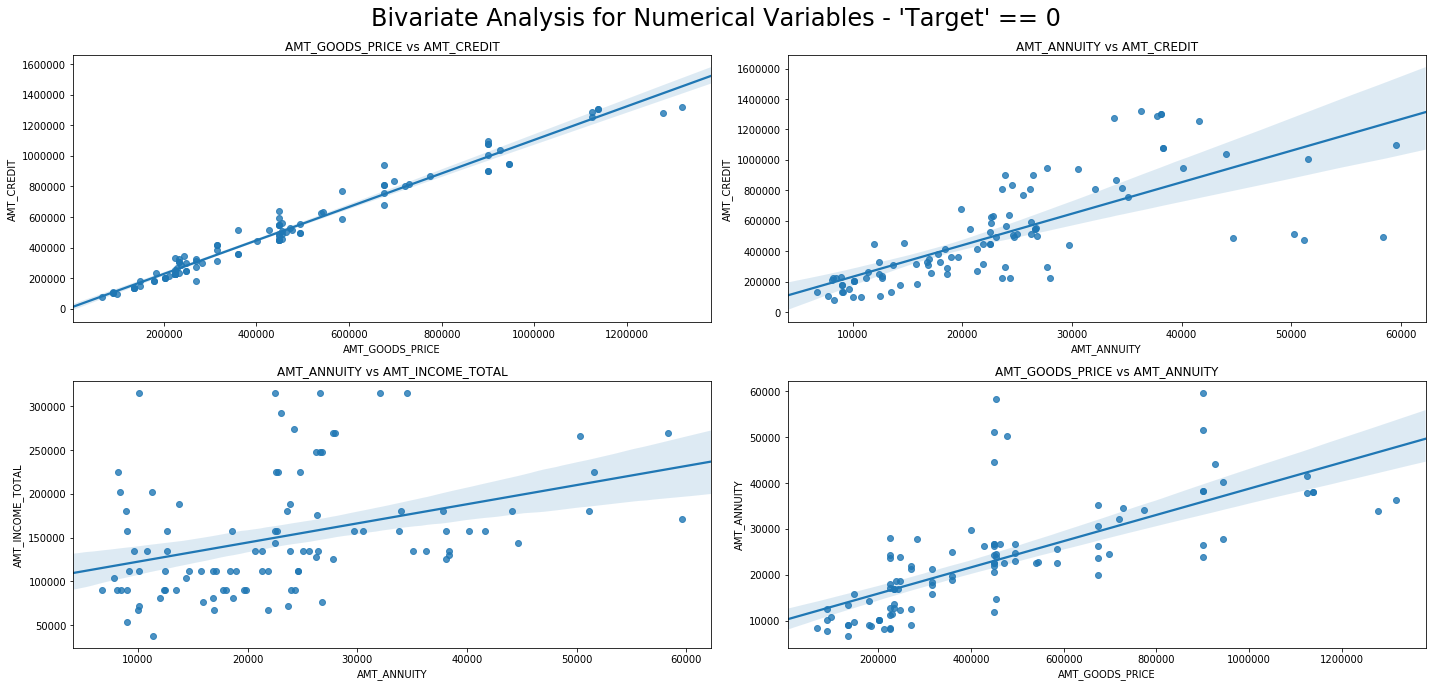

In [170]:
x=app0.sample(100)
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.title('AMT_GOODS_PRICE vs AMT_CREDIT',fontsize=12)
sns.regplot(y='AMT_CREDIT',x='AMT_GOODS_PRICE', data=x)
plt.subplot(222)
plt.title('AMT_ANNUITY vs AMT_CREDIT',fontsize=12)
sns.regplot(y='AMT_CREDIT',x='AMT_ANNUITY', data=x)
plt.subplot(223)
plt.title('AMT_ANNUITY vs AMT_INCOME_TOTAL',fontsize=12)
sns.regplot(y='AMT_INCOME_TOTAL',x='AMT_ANNUITY', data=x)
plt.subplot(224)
plt.title('AMT_GOODS_PRICE vs AMT_ANNUITY',fontsize=12)
sns.regplot(y='AMT_ANNUITY',x='AMT_GOODS_PRICE', data=x)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Bivariate Analysis for Numerical Variables - \'Target\' == 0',fontsize=24)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;">Depending on the correlation coefficient, the graphs are distributed as above. The best fit line describes the relationship between the attributes more precisely.<br>As the correlation between goods price and Credit amount is 0.98 which is very close to 1, you can see the linear relationship between the two attributes very clearly.

<font color='Green'><h2><center>Univariate Analysis: Target '1'</center></h2></font>

### Categorical Variables

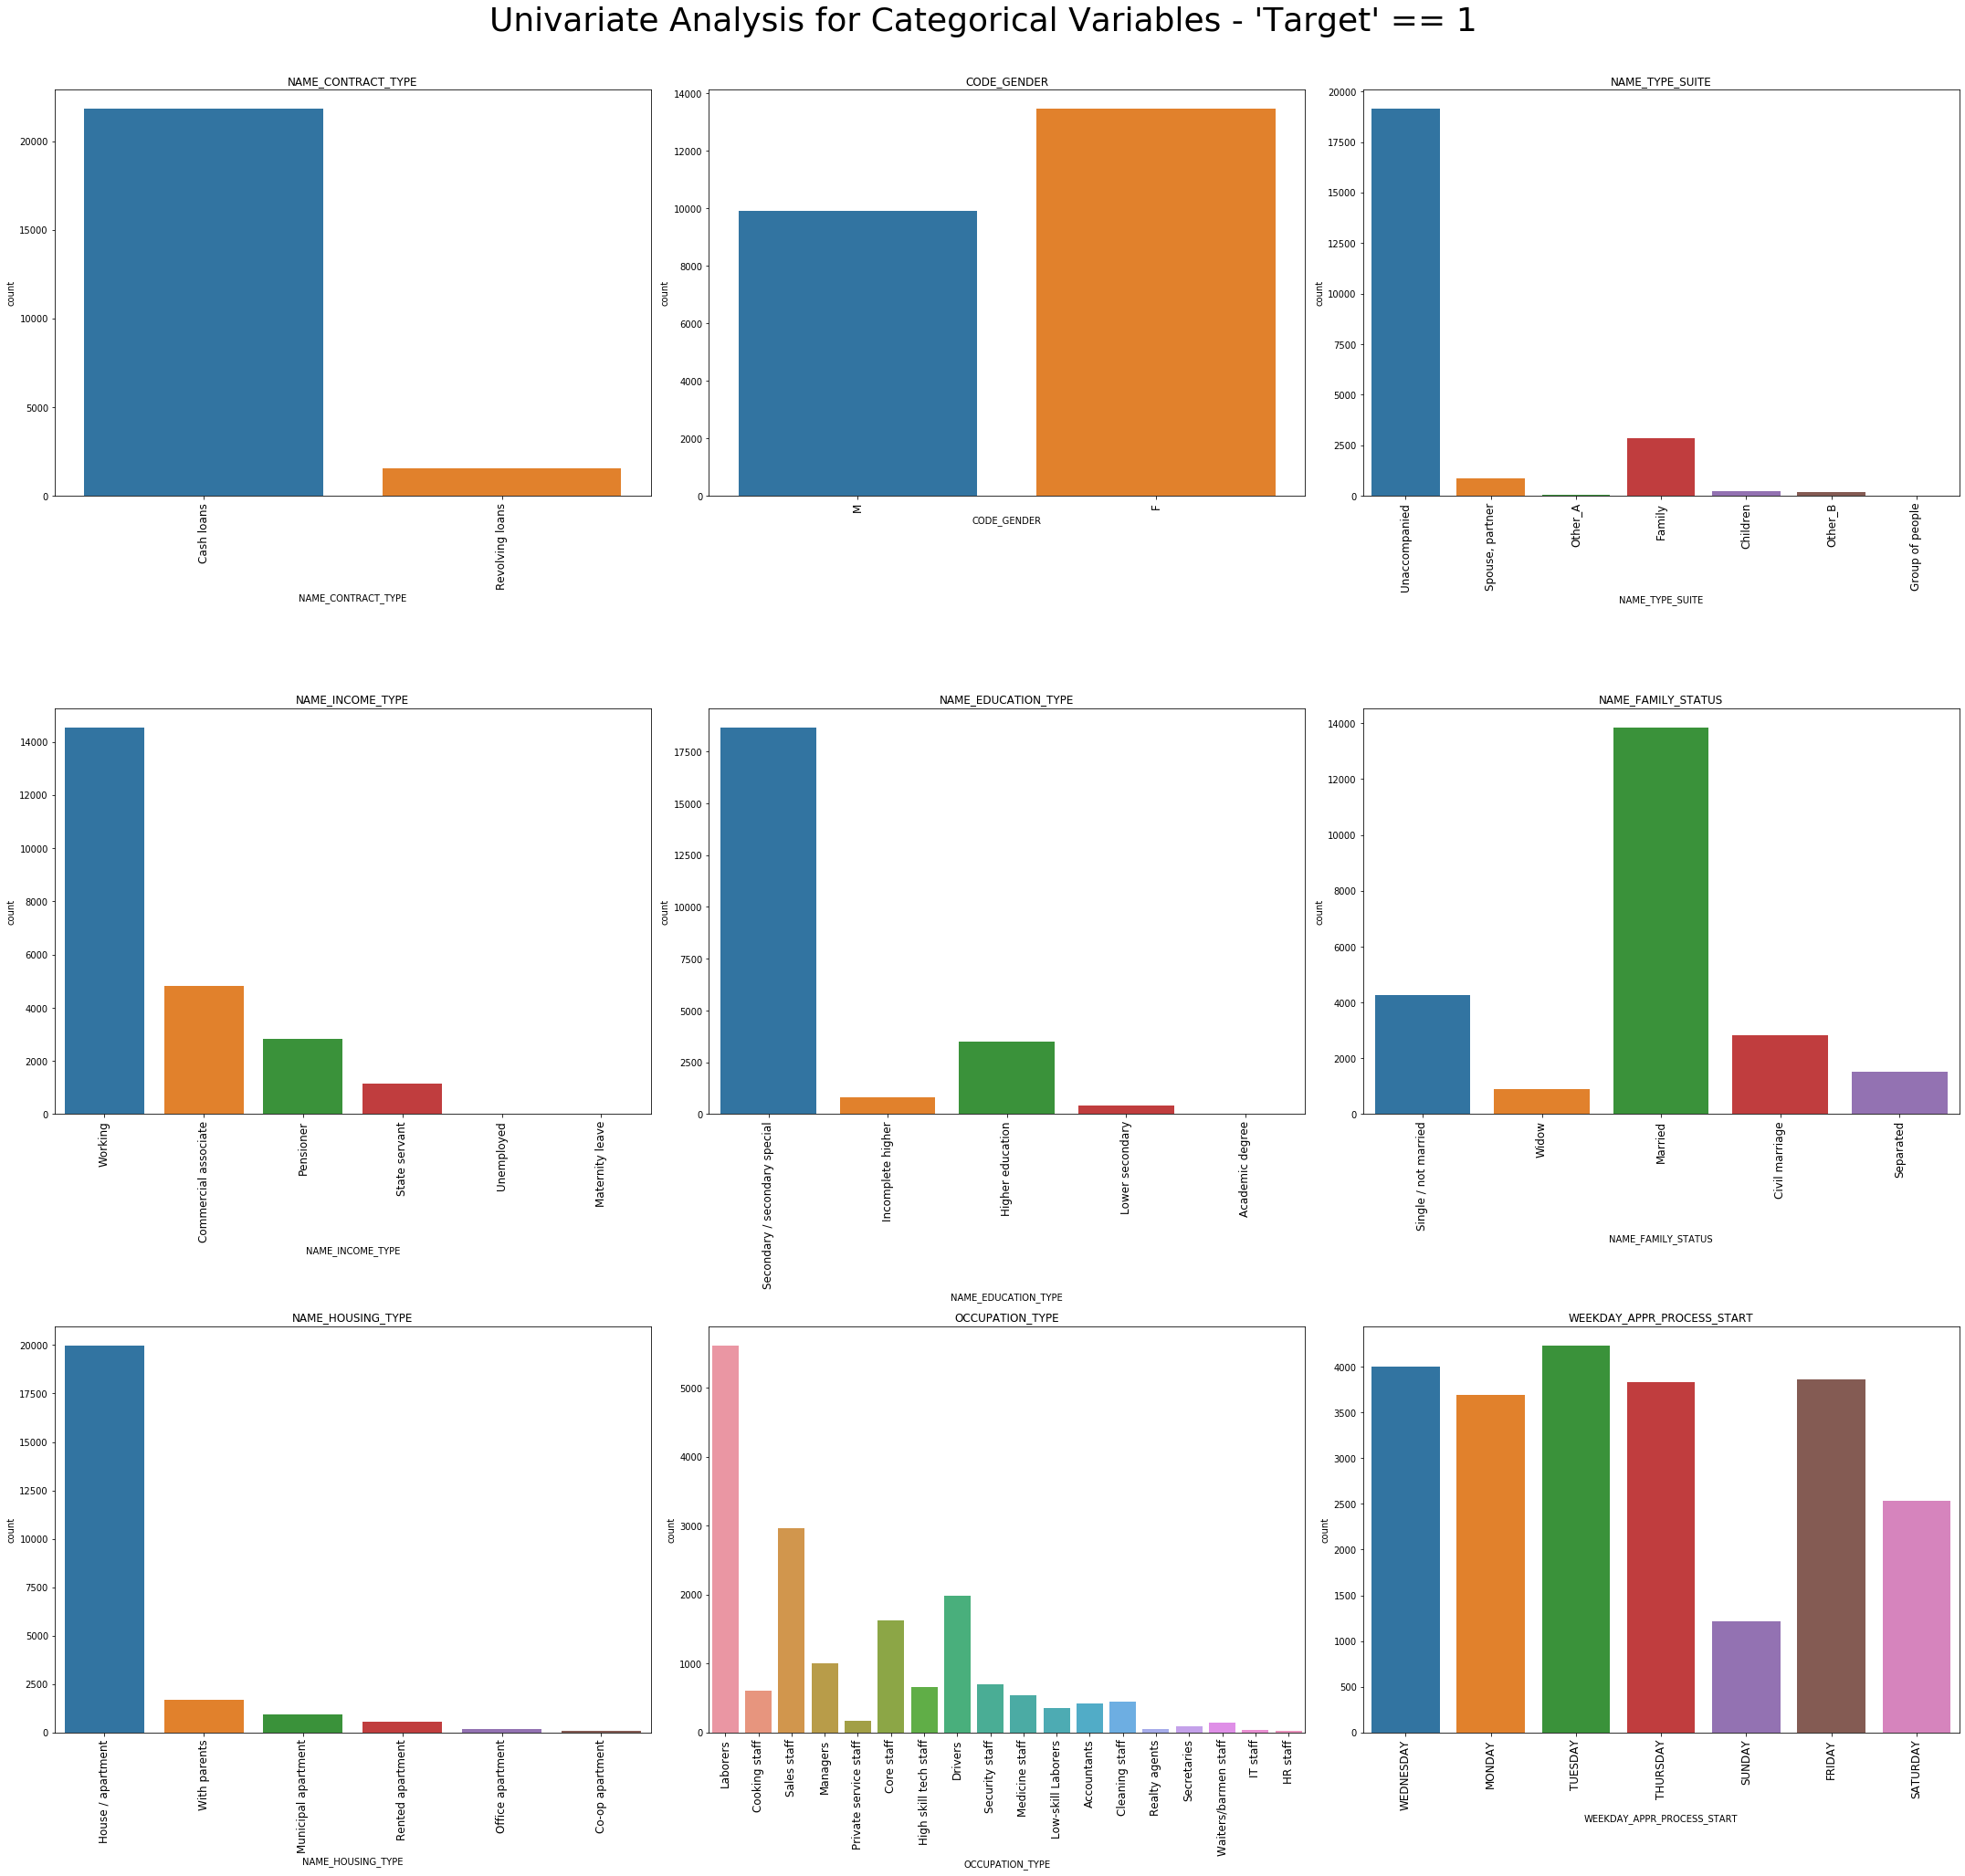

In [171]:
appcat=[]
for i in app_cat0.columns:
    appcat.append(i)
j=1
plt.figure(figsize=(30,30))
for i in appcat:
    plt.subplot(3,3,j)
    plt.title(i,fontsize=12)
    sns.countplot(i,data=app_cat1)
    plt.xticks(rotation=90,fontsize=12)
    j=j+1
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Univariate Analysis for Categorical Variables - \'Target\' == 1',fontsize=36)
plt.show()


<p style="font-family: Arial; font-size:1.0em;color:blue;"> Below inferences mentioned are limited to the customers with payment difficulties correspoding to Target 1 only:<br>
    1. Customers are considering more Cashloans than Revolving loans. <br>
    2. Most of the people who are having payment difficulties are working professionals. <br>
    3. Married couples are facing more payment diculties when compared to people of other family statuses.<br>
    4. The housing situation of the people with hosuing diffulties is House / apartement in majority

### Numerical Variables

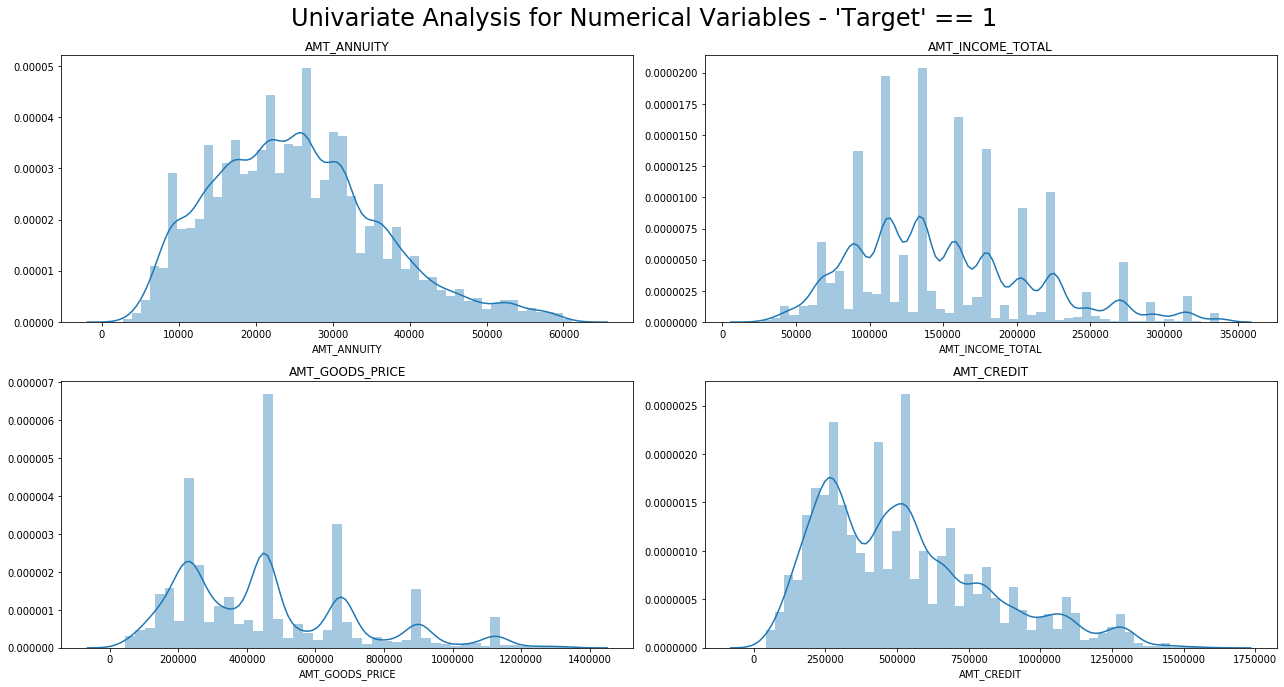

In [172]:
col=['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','AMT_CREDIT']
j=1
app1.dropna(subset=col,inplace=True)
plt.figure(figsize=(18,10))
for i in col:
    plt.subplot(2,2,j)
    plt.title(i,fontsize=12)
    sns.distplot(app1[i])
    j=j+1
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Univariate Analysis for Numerical Variables - \'Target\' == 1',fontsize=24)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;">Analysis -<br>
    1. High values of 'AMT_ANNUITY' are concentrated between 20000 - 30000<br>
    2. High values of 'AMT_INCOME_TOTAL' are concentrated between 100000 - 150000<br>
    3. Decreasing trend is seen in 'AMT_CREDIT'.

<font color='Green'><h2><center>Bivariate Analysis: Target '1'</center></h2></font>

### Correlation

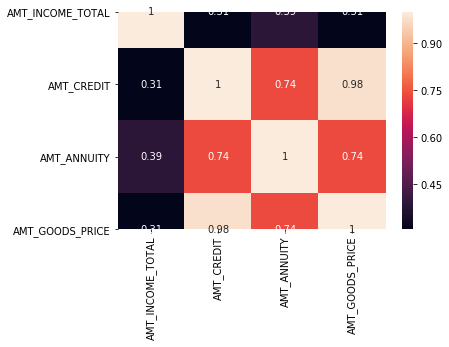

In [173]:
ax=sns.heatmap(app1[z].corr(),annot=True)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;">From the above heatmap, we can determine that the coorelation between AMT_GOODS_PRICE and AMT_CREDIT is 0.98 which depicts that both are the features are following a very good linear relationship.<br>Similary, from the heatmap, below are the features which have correlated nicely.<br>1. AMT_CREDIT and AMT_GOODS_PRICE -    0.98<br>2. AMT_CREDIT and AMT_ANNUITY -    0.74<br>3. AMT_ANNUITY and AMT_GOODS_PRICE -   0.74<br>4. AMT_ANNUITY and AMT_INCOME_TOTAL -   0.3<br>5. AMT_INCOME_TOTAL and AMT_GOODS_PRICE -    0.3<br>6. AMT_INCOME_TOTAL and AMT_CREDIT -   0.33<br>

<p style="font-family: Arial; font-size:1.0em;color:blue;">So, we consider the below features as the 4 most important features.<br>1. AMT_CREDIT<br>2. AMT_GOODS_PRICE<br>3. AMT_ANNUITY <br>4. AMT_INCOME_TOTAL<br>

### Categorical and Numerical Variables

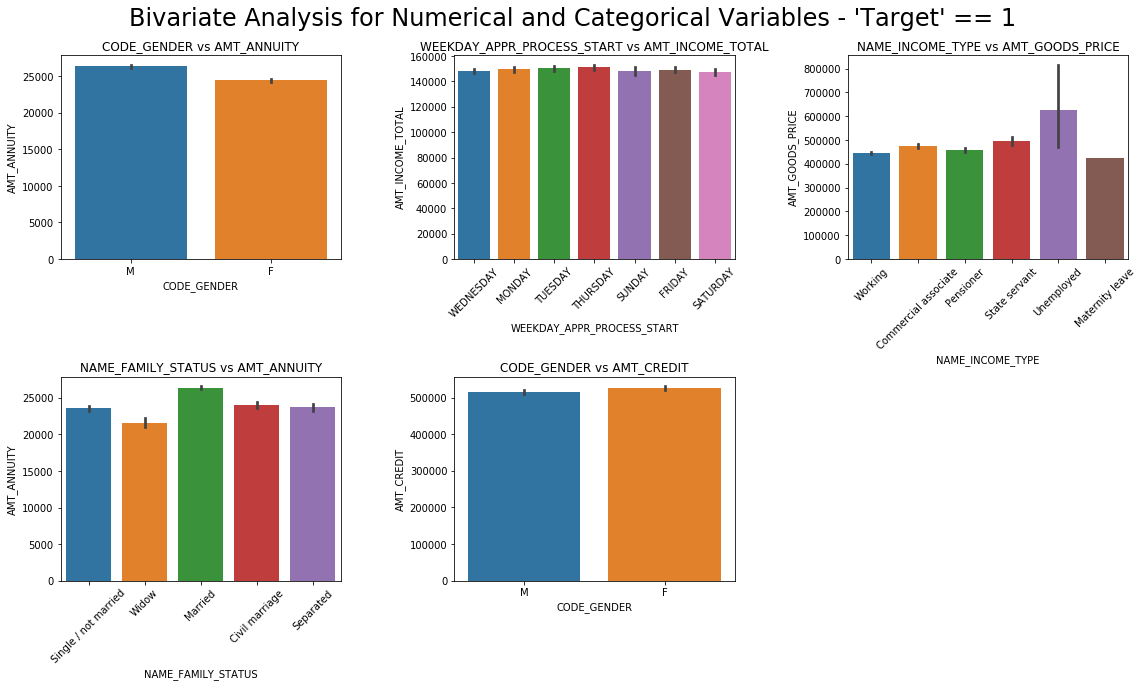

In [174]:
plt.figure(figsize=(16,10))
plt.subplot(231)
plt.title('CODE_GENDER vs AMT_ANNUITY',fontsize=12)
sns.barplot(y='AMT_ANNUITY',x='CODE_GENDER', data=app1)
plt.subplot(232)
plt.title('WEEKDAY_APPR_PROCESS_START vs AMT_INCOME_TOTAL',fontsize=12)
sns.barplot(y='AMT_INCOME_TOTAL',x='WEEKDAY_APPR_PROCESS_START', data=app1)
plt.xticks(rotation=45)
plt.subplot(233)
plt.title('NAME_INCOME_TYPE vs AMT_GOODS_PRICE',fontsize=12)
sns.barplot(y='AMT_GOODS_PRICE',x='NAME_INCOME_TYPE', data=app1)
plt.xticks(rotation=45)
plt.subplot(234)
plt.title('NAME_FAMILY_STATUS vs AMT_ANNUITY',fontsize=12)
sns.barplot(y='AMT_ANNUITY',x='NAME_FAMILY_STATUS', data=app1)
plt.xticks(rotation=45)
plt.subplot(235)
plt.title('CODE_GENDER vs AMT_CREDIT',fontsize=12)
sns.barplot(y='AMT_CREDIT',x='CODE_GENDER', data=app1)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Bivariate Analysis for Numerical and Categorical Variables - \'Target\' == 1',fontsize=24)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;">The above plot shows how the categorical features are distributed with the numerical variables. The below points are limited omly for target variable 1<br>
1. The average loan annuity is higher for males when compared to other genders.<br>
2. The average loan annuity is higher for Married people when compared to people of other familiy stauses.<br>
3. The average price of the goods for which the loan is given is highest for unemployed people.

### Numerical Variables

<p style="font-family: Arial; font-size:1.0em;color:blue;">As the dataset contains enormous amount of data, plotting all the points will make the plot more complex and chaotic. So, we are considering a set of 100 points for the below bivariate analysis.

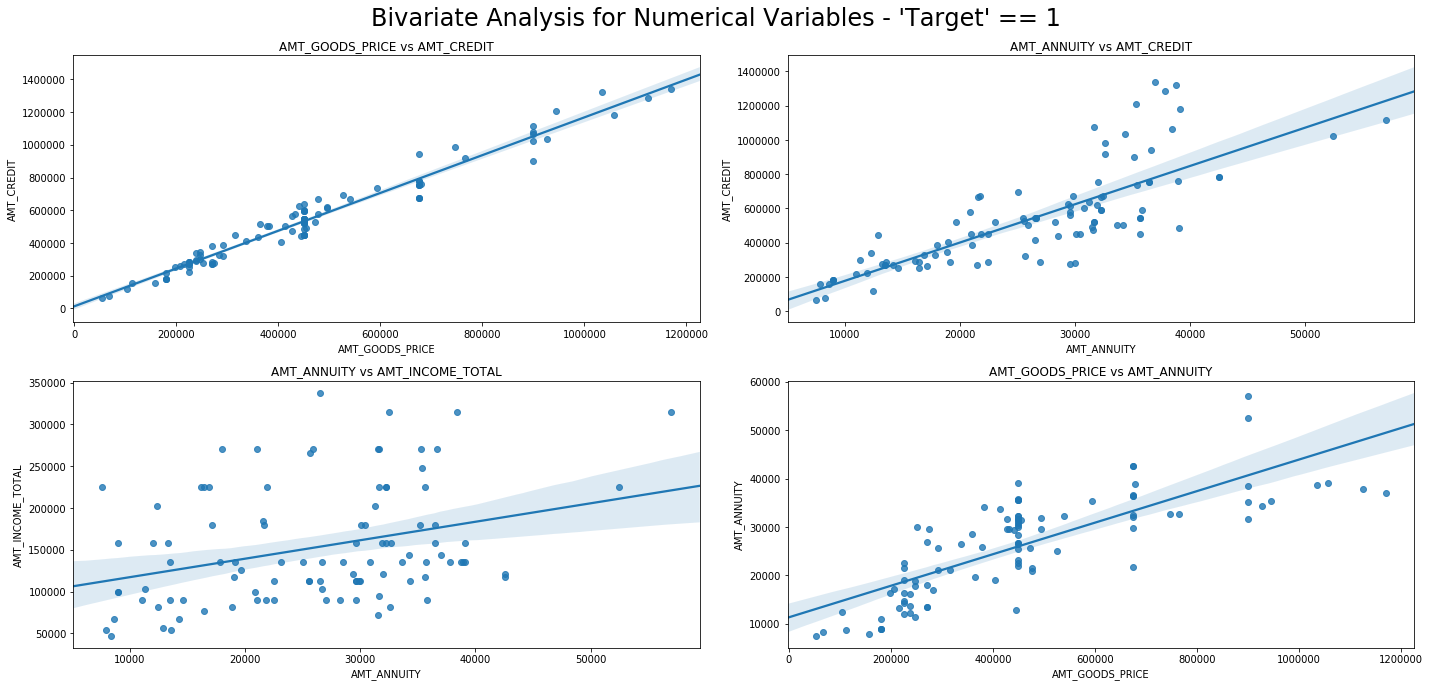

In [175]:
x=app1.sample(100)
fig=plt.figure(figsize=(20,10))
plt.subplot(221)
plt.title('AMT_GOODS_PRICE vs AMT_CREDIT',fontsize=12)
sns.regplot(y='AMT_CREDIT',x='AMT_GOODS_PRICE', data=x)
plt.subplot(222)
plt.title('AMT_ANNUITY vs AMT_CREDIT',fontsize=12)
sns.regplot(y='AMT_CREDIT',x='AMT_ANNUITY', data=x)
plt.subplot(223)
plt.title('AMT_ANNUITY vs AMT_INCOME_TOTAL',fontsize=12)
sns.regplot(y='AMT_INCOME_TOTAL',x='AMT_ANNUITY', data=x)
plt.subplot(224)
plt.title('AMT_GOODS_PRICE vs AMT_ANNUITY',fontsize=12)
sns.regplot(y='AMT_ANNUITY',x='AMT_GOODS_PRICE', data=x)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Bivariate Analysis for Numerical Variables - \'Target\' == 1',fontsize=24)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;">Depending on the correlation coefficient, the graphs are distributed as above. The best fit line describes the relationship between the attributes more precisely.<br>As the correlation between goods price and Credit amount is 0.98 which is very close to 1, you can see the linear relationship between the two attributes very clearly.

<p style="font-family: Arial; font-size:1.0em;color:blue;">From the above analysis, we consider the below columns as the most important features which effect the Target variables.<br>
1. NAME_INCOME_TYPE<br>2. NAME_HOUSING_TYPE
    <br>3. OCCUPATION_TYPE<br>4. NAME_FAMILY_STATUS<br>5. AMT_CREDIT<br>6. AMT_GOODS_PRICE<br>7. AMT_ANNUITY<br>8. AMT_INCOME_TOTAL

In [176]:
application_final=application[['SK_ID_CURR','NAME_INCOME_TYPE','NAME_HOUSING_TYPE','OCCUPATION_TYPE','NAME_FAMILY_STATUS','AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY','AMT_INCOME_TOTAL','TARGET']]

<p style="font-family: Arial; font-size:1.0em;color:blue;">We also considered the Target variable and the loan ID in the dataframe for further grouping analysis while merging with previous loan history dataframe.

In [177]:
application_final.head()

,SK_ID_CURR,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE,NAME_FAMILY_STATUS,AMT_CREDIT,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_INCOME_TOTAL,TARGET
0,100002,Working,House / apartment,Laborers,Single / not married,406597.5,351000.0,24700.5,202500.0,1
1,100003,State servant,House / apartment,Core staff,Married,1293502.5,1129500.0,35698.5,270000.0,0
2,100004,Working,House / apartment,Laborers,Single / not married,135000.0,135000.0,6750.0,67500.0,0
3,100006,Working,House / apartment,Laborers,Civil marriage,312682.5,297000.0,29686.5,135000.0,0
4,100007,Working,House / apartment,Core staff,Single / not married,513000.0,513000.0,21865.5,121500.0,0


### General Checks on Previous application data

Now, let's understand the data

In [178]:
# Get the head of the dataframe.
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
# Get the tail of the dataframe.
previous.tail()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,...,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


In [180]:
# Get the info of the dataframe.
previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [181]:
# Get the shape of the dataframe.
previous.shape

(1670214, 37)

### Calculate the Null values

<p style="font-family: Arial; font-size:1.0em;color:blue;">Let's check the data quality and treatment for missing values.

<p style="font-family: Arial; font-size:1.0em;color:blue;">We have 3 ambiguous values in the entire dataset. They are XNA, XAP and 365243.
<br>Let's replace these values with null for better analysis<br>XNA/XAP denote NA values and value 365243 denotes infinity in DAYS variables in the datasets, therefore we can consider them NA values.

In [182]:
# Replace.
previous.replace(365243,np.nan,inplace=True)
previous.replace('XAP',np.nan,inplace=True)
previous.replace('XNA',np.nan,inplace=True)

In [183]:
# Calculate the percentage of missing/null values
(previous.isnull().mean()*100).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.02
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE         95.83
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE              37.56
CODE_REJECT_REASON             81.33
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.12
NAME_GOODS_CATEGORY            56.93
NAME_PORTFOLIO                 22.29
NAME_PRODUCT_TYPE              63.68
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

<p style="font-family: Arial; font-size:1.0em;color:blue;"> Dropping the columns with high percentage of Null values.

In [184]:
previous.drop(columns=['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','NAME_CASH_LOAN_PURPOSE','CODE_REJECT_REASON','DAYS_FIRST_DRAWING'], inplace=True)

<p style="font-family: Arial; font-size:1.0em;color:blue;">Below are the columns left after deleting the columns with high percentage Null values.

In [185]:
previous.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [186]:
# Check the percentage of missing values for all the columns.
(previous.isnull().mean()*100).round(2).sort_values()

SK_ID_PREV                      0.00
SELLERPLACE_AREA                0.00
DAYS_DECISION                   0.00
NAME_CONTRACT_STATUS            0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
CHANNEL_TYPE                    0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
AMT_CREDIT                      0.00
AMT_APPLICATION                 0.00
SK_ID_CURR                      0.00
PRODUCT_COMBINATION             0.02
NAME_CONTRACT_TYPE              0.02
NAME_CLIENT_TYPE                0.12
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
NAME_PORTFOLIO                 22.29
AMT_GOODS_PRICE                23.08
NAME_YIELD_GROUP               30.97
NAME_PAYMENT_TYPE              37.56
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DUE                 42.73
DAYS_LAST_DUE_1ST_VERSION      45.92
NAME_TYPE_SUITE                49.12
NAME_SELLER_INDUSTRY           51.23
DAYS_LAST_DUE                  52.94
R

<p style="font-family: Arial; font-size:1.0em;color:blue;">Let's assume we treat the columns with less than 13% of missing values.</p>

In [187]:
# Category count for 'PRODUCT_COMBINATION' column.
previous['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

<p style="font-family: Arial; font-size:1.0em;color:blue;">Analysis - We can impute the missing values with 'Cash', since this is most common occuring value.<br>


`previous.loc[pd.isnull(previous['PRODUCT_COMBINATION']), ['PRODUCT_COMBINATION']] = "Cash"`

In [188]:
# Category count for 'NAME_CONTRACT_TYPE' column.
previous['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
Name: NAME_CONTRACT_TYPE, dtype: int64

<p style="font-family: Arial; font-size:1.0em;color:blue;">Analysis - We can impute the missing values with 'Cash loans', since this is most common occuring value.<br>


`previous.loc[pd.isnull(previous['NAME_CONTRACT_TYPE']), ['NAME_CONTRACT_TYPE']] = "Cash loans"`

In [189]:
# Category count for 'NAME_CLIENT_TYPE' column.
previous['NAME_CLIENT_TYPE'].value_counts()

Repeater     1231261
New           301363
Refreshed     135649
Name: NAME_CLIENT_TYPE, dtype: int64

<p style="font-family: Arial; font-size:1.0em;color:blue;">Analysis - We can impute the missing values with 'Cash loans', since this is most common occuring value.<br>


`previous.loc[pd.isnull(previous['NAME_CLIENT_TYPE']), ['NAME_CLIENT_TYPE']] = "Repeater"`

In [190]:
# Check the datatypes of all the columns and change if required.
previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 32 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670213 non-null float64
NAME_CONTRACT_TYPE             1669868 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
NAME_CONTRACT_STATUS           1670214 non-null object
DAYS_DECISION                  1670214 non-null int64
NAME_PAYMENT_TYPE              1042830 non-null object
NAME_T

<p style="font-family: Arial; font-size:1.0em;color:blue;"> Observation: The datatypes of all the columns is appropriate.

In [191]:
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877.0,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,35,Connectivity,12.0,middle,POS mobile with interest,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129.0,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,-1,NaN,36.0,low_action,Cash X-Sell: low,-134.0,916.0,NaN,NaN,1.0
2,2523466,122040.0,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,-1,NaN,12.0,high,Cash X-Sell: high,-271.0,59.0,NaN,NaN,1.0
3,2819243,176158.0,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,-1,NaN,12.0,middle,Cash X-Sell: middle,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054.0,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,-1,NaN,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN


In [192]:
# Unique values per column
previous.nunique().sort_values()

NFLAG_INSURED_ON_APPROVAL            2
NAME_PRODUCT_TYPE                    2
NFLAG_LAST_APPL_IN_DAY               2
FLAG_LAST_APPL_PER_CONTRACT          2
NAME_CLIENT_TYPE                     3
NAME_PAYMENT_TYPE                    3
NAME_CONTRACT_TYPE                   3
NAME_PORTFOLIO                       4
NAME_YIELD_GROUP                     4
NAME_CONTRACT_STATUS                 4
WEEKDAY_APPR_PROCESS_START           7
NAME_TYPE_SUITE                      7
CHANNEL_TYPE                         8
NAME_SELLER_INDUSTRY                10
PRODUCT_COMBINATION                 17
HOUR_APPR_PROCESS_START             24
NAME_GOODS_CATEGORY                 27
CNT_PAYMENT                         49
SELLERPLACE_AREA                  2097
DAYS_TERMINATION                  2829
DAYS_LAST_DUE                     2872
DAYS_FIRST_DUE                    2891
DAYS_DECISION                     2922
DAYS_LAST_DUE_1ST_VERSION         4604
AMT_DOWN_PAYMENT                 29278
AMT_CREDIT               

<p style="font-family: Arial; font-size:1.0em;color:blue;">Let's remove outliers for few numerical columns. To remove the outliers, we will use the same function which we used to delete the outliers in the application data.Here, we will remove the outliers in AMT_ANNUITY, RATE_DOWN_PAYMENT and AMT_GOODS_PRICE columns.

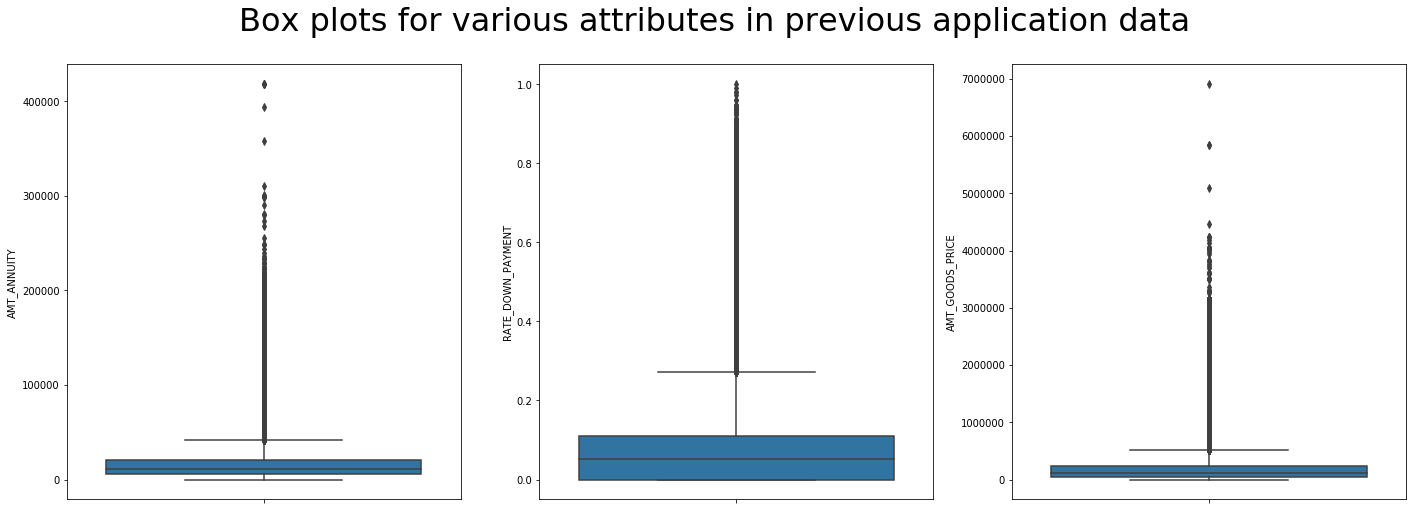

In [193]:
f

<p style="font-family: Arial; font-size:1.0em;color:blue;">shape of the dataframe before deleting the outliers.

In [194]:
previous.shape

(1670214, 32)

<p style="font-family: Arial; font-size:1.0em;color:blue;">clearly,we can see the outliers in the data.So, we pass the columns through the remove_outlier function where the outliers have to be removed.

In [195]:
previous=remove_outlier(previous,columns_to_remove_outliers)

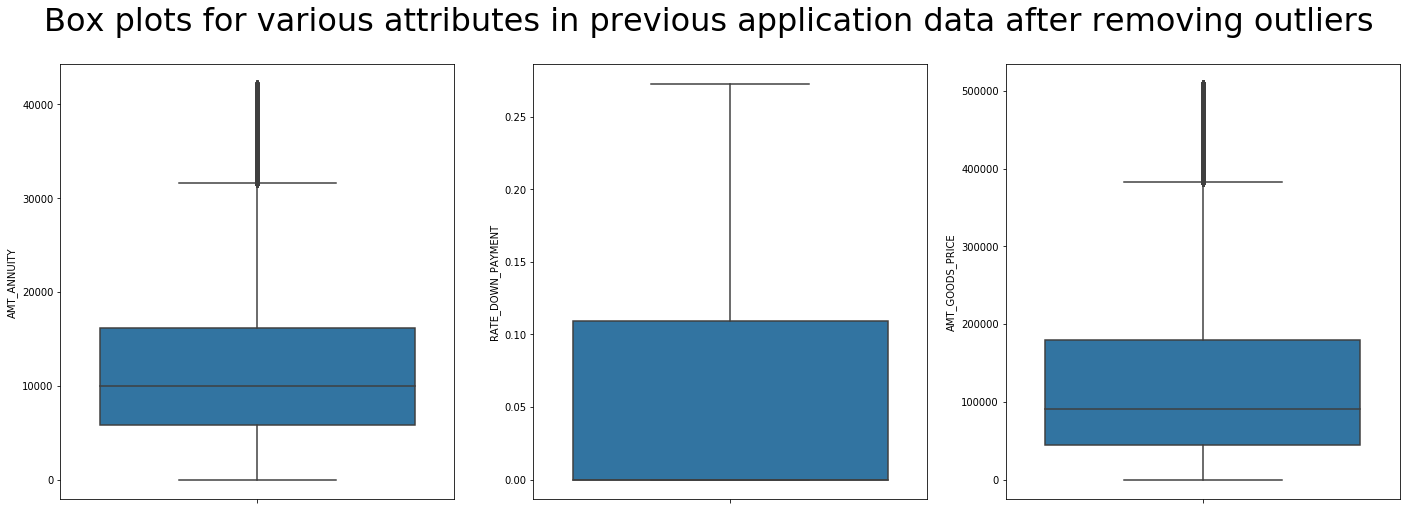

In [196]:
fig, axes = plt.subplots(1, len(columns_to_remove_outliers), figsize=(24,8))
for column, ax in zip(columns_to_remove_outliers,range(len(columns_to_remove_outliers))):
    sns.boxplot(y=previous[column],ax=axes[ax])
plt.suptitle("Box plots for various attributes in previous application data after removing outliers",fontsize=32)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;">shape of the dataframe after deleting the outliers.

In [197]:
previous.shape

(1464874, 32)

In [198]:
previous.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

<font color='Green'><h2><center>Univariate Analysis: Previous Application Data</center></h2></font>

### Categorical Variables

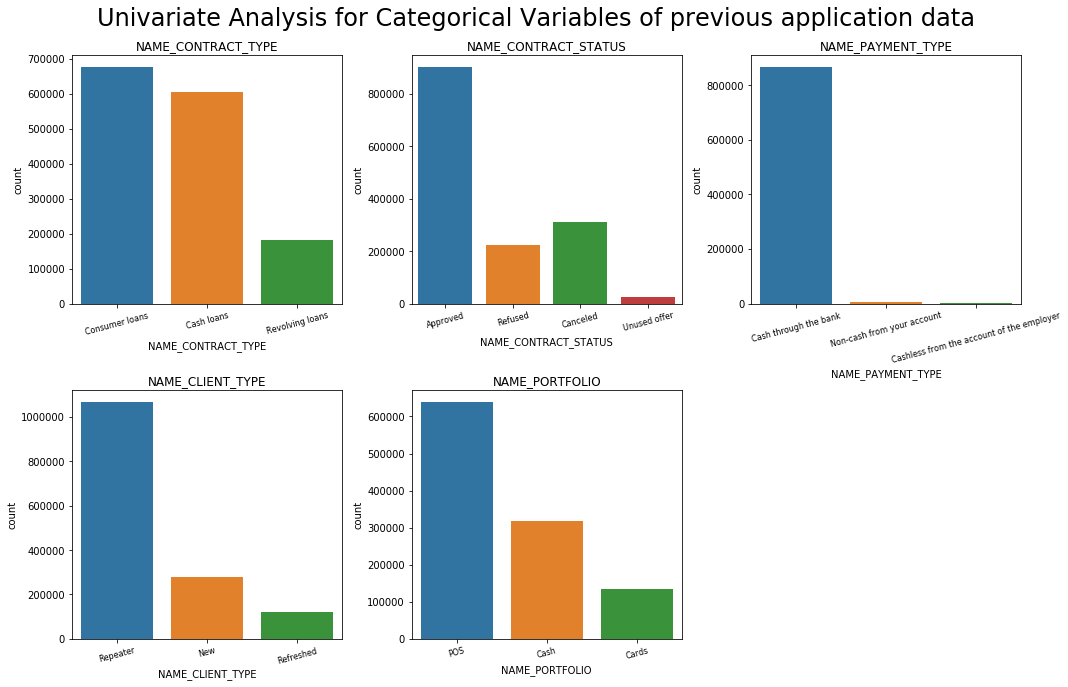

In [199]:
previous_categorical = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO']
j=1
plt.figure(figsize=(15,10))
for i in previous_categorical:
    plt.subplot(2,3,j)
    plt.title(i,fontsize=12)
    sns.countplot(i,data=previous)
    plt.xticks(rotation=15,fontsize=8)
    j=j+1
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Univariate Analysis for Categorical Variables of previous application data', fontsize=24)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;">Analysis<br>1. More Consumer loans were sanctioned by the bank than cash and revolving loans.<br>2. Majority of the loans are approved with few rejected, unused and unused.<br>3. Majority of the loans were sanctioned for cash through the bank payment type.<br>4. There were majority of repeater customers in the bank loan history.

### Numerical variables

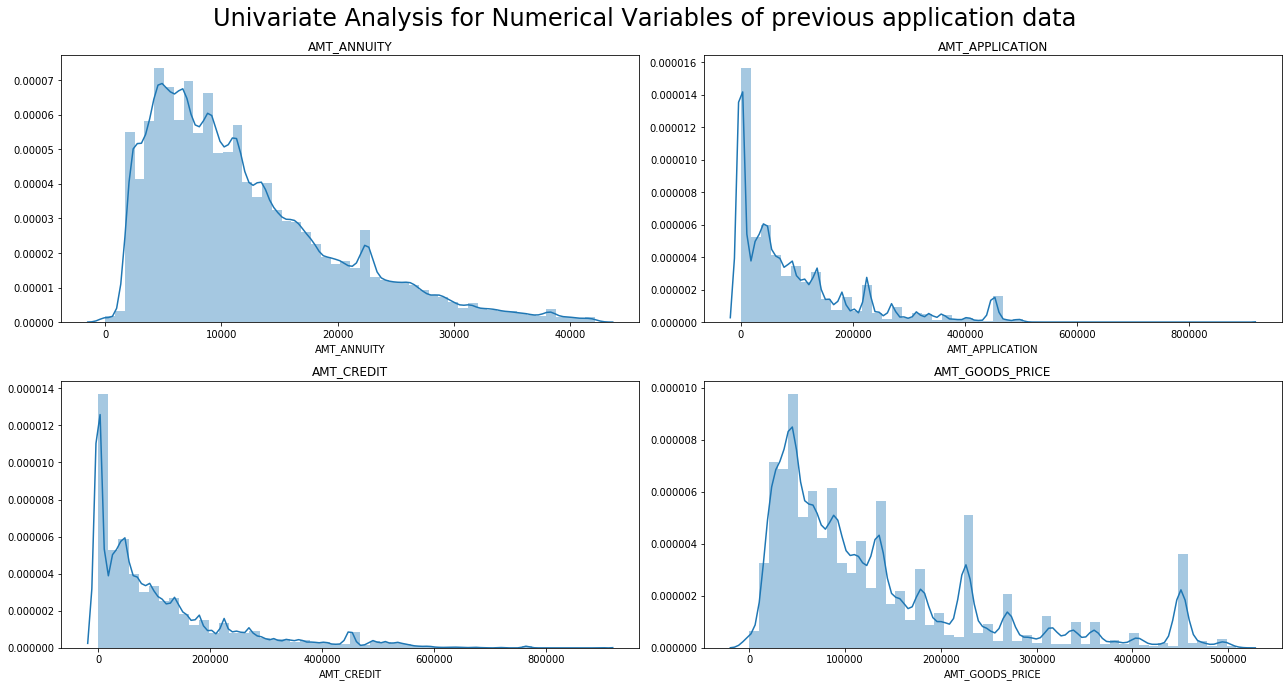

In [200]:
previous_numerical=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE']
plt.figure(figsize=(18,10))
j=1
for i in previous_numerical:
    plt.subplot(2,2,j)
    plt.title(i,fontsize=12)
    sns.distplot(previous[i].dropna())
    j=j+1
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Univariate Analysis for Numerical Variables of previous application data',fontsize=24)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;">Analysis -<br>
    1. High values of 'AMT_ANNUITY' are concentrated below 10000<br>
    2. 'AMT_APPLICATION','AMT_CREDIT' have high amounts of '0' value

<font color='Green'><h2><center>Bivariate Analysis: Previous Application Data</center></h2></font>

### Correlation

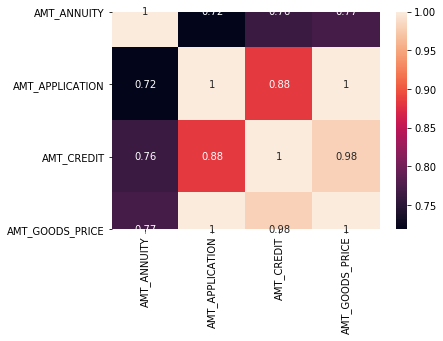

In [201]:
previous_numerical=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE']
sns.heatmap(previous[previous_numerical].corr(),annot=True)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;">From the above heatmap, we can determine that the coorelation between AMT_GOODS_PRICE and AMT_CREDIT is 0.98 which depicts that both are the features are following a very good linear relationship.<br>
Similary, from the heatmap, below are the features which have correlated nicely.<br>
1. AMT_GOODS_PRICE and AMT_CREDIT - 0.98<br>
2. AMT_CREDIT and AMT_APPLICATION - 0.88<br>
3. AMT_GOODS_PRICE and AMT_ANNUITY - 0.77<br>
4. AMT_CREDIT and AMT_ANNUITY - 0.76<br>
5. AMT_ANNUITY and AMT_APPLICATION - 0.72


<p style="font-family: Arial; font-size:1.0em;color:blue;">Therefore, we consider the below as the important numerical features that effect previousloan history dataframe.<br>1. AMT_ANNUITY<br>2. AMT_GOODS_PRICE<br>3. AMT_APPLICATION<br>4. AMT_CREDIT

### Numerical and categorical variables.

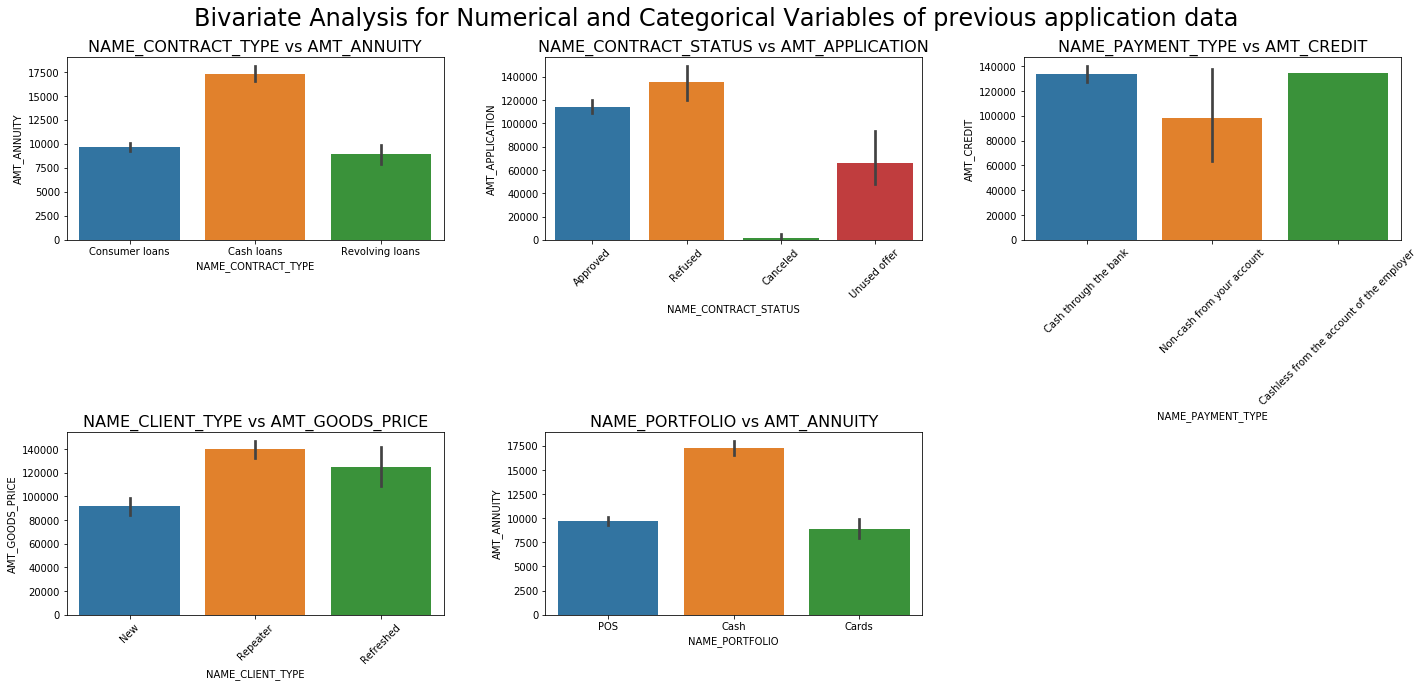

In [202]:
previous_s=previous.sample(2000)
plt.figure(figsize=(20,10))
plt.subplot(231)
plt.title('NAME_CONTRACT_TYPE vs AMT_ANNUITY',fontsize=16)
sns.barplot(y='AMT_ANNUITY',x='NAME_CONTRACT_TYPE', data=previous_s)
plt.subplot(232)
plt.title('NAME_CONTRACT_STATUS vs AMT_APPLICATION',fontsize=16)
sns.barplot(y='AMT_APPLICATION',x='NAME_CONTRACT_STATUS', data=previous_s)
plt.xticks(rotation=45)
plt.subplot(233)
plt.title('NAME_PAYMENT_TYPE vs AMT_CREDIT',fontsize=16)
sns.barplot(y='AMT_CREDIT',x='NAME_PAYMENT_TYPE', data=previous_s)
plt.xticks(rotation=45)
plt.subplot(234)
plt.title('NAME_CLIENT_TYPE vs AMT_GOODS_PRICE',fontsize=16)
sns.barplot(y='AMT_GOODS_PRICE',x='NAME_CLIENT_TYPE', data=previous_s)
plt.xticks(rotation=45)
plt.subplot(235)
plt.title('NAME_PORTFOLIO vs AMT_ANNUITY',fontsize=16)
sns.barplot(y='AMT_ANNUITY',x='NAME_PORTFOLIO', data=previous_s)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Bivariate Analysis for Numerical and Categorical Variables of previous application data',fontsize=24)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;">1. The annuity amount is very high for cash loans when compared to Consumer and Revolving loans.<br>2. From the previous loan hostoryof the bank, number of rejected loans is more than that of approved, cancelled and unsued.<br>3. The annuity amount of the Cash Portfolio is high compared to POS and cards.

### Numerical data.

<p style="font-family: Arial; font-size:1.0em;color:blue;">As the dataset contains enormous amount of data, plotting all the points will make the plot more complex and chaotic. So, we are considering a set of 100 points for the below bivariate analysis.

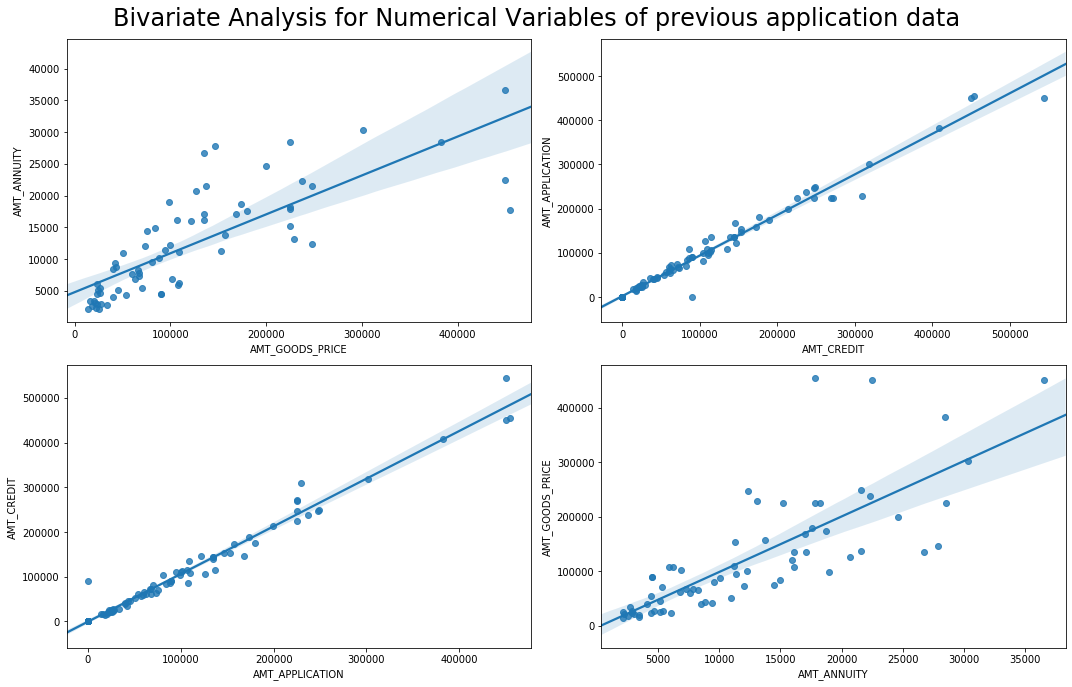

In [203]:
previous_sample=previous.sample(n=100, random_state=42)
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.regplot(y='AMT_ANNUITY',x='AMT_GOODS_PRICE', data=previous_sample)
plt.subplot(222)
sns.regplot(y='AMT_APPLICATION',x='AMT_CREDIT', data=previous_sample)
plt.subplot(223)
sns.regplot(y='AMT_CREDIT',x='AMT_APPLICATION', data=previous_sample)
plt.subplot(224)
sns.regplot(y='AMT_GOODS_PRICE',x='AMT_ANNUITY', data=previous_sample)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Bivariate Analysis for Numerical Variables of previous application data',fontsize=24)
plt.show()           

<p style="font-family: Arial; font-size:1.0em;color:blue;">Depending on the correlation coefficient, the graphs are distributed as above. The best fit line describes the relationship between the attributes more precisely.<br>
As the correlation between application amount and Credit amount is 0.98 which is very close to 1, you can see the linear relationship between the two attributes very clearly.

<p style="font-family: Arial; font-size:1.0em;color:blue;">
From the above analysis, below mentioned columns are considered as the important features which effect the contract status of the bank: <br> 1. NAME_CONTRACT_TYPE<br>2. AMT_ANNUITY<br>3. AMT_APPLICATION4. AMT_CREDIT5. AMT_GOODS_PRICE6. NAME_CONTRACT_STATUS<br>7. NAME_PAYMENT_TYPE<br>8. NAME_CLIENT_TYPE<br>9. NAME_PORTFOLIO<br>9. CHANNEL_TYPE<br>10 NAME_YIELD_GROUP<br>11. DAYS_FIRST_DUE<br>12. DAYS_LAST_DUE_1ST_VERSION<br>13. DAYS_LAST_DUE<br>14. NFLAG_INSURED_ON_APPROVAL

<p style="font-family: Arial; font-size:1.0em;color:blue;">We also considered current load id and past loan id's for merging and grouping purposes.

In [204]:
previous_final=previous[['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE','NAME_YIELD_GROUP','DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
        'NFLAG_INSURED_ON_APPROVAL']]
previous_final.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_YIELD_GROUP,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877.0,Consumer loans,1730.430,17145.0,17145.0,17145.0,Approved,Cash through the bank,Repeater,POS,Country-wide,middle,-42.0,300.0,-42.0,0.0
2,2523466,122040.0,Cash loans,15060.735,112500.0,136444.5,112500.0,Approved,Cash through the bank,Repeater,Cash,Credit and cash offices,high,-271.0,59.0,NaN,1.0
4,1784265,202054.0,Cash loans,31924.395,337500.0,404055.0,337500.0,Refused,Cash through the bank,Repeater,Cash,Credit and cash offices,high,NaN,NaN,NaN,NaN
5,1383531,199383.0,Cash loans,23703.930,315000.0,340573.5,315000.0,Approved,Cash through the bank,Repeater,Cash,Credit and cash offices,low_normal,-654.0,-144.0,-144.0,1.0
6,2315218,175704.0,Cash loans,NaN,0.0,0.0,NaN,Canceled,NaN,Repeater,NaN,Credit and cash offices,NaN,NaN,NaN,NaN,NaN


### Merge the dataframes

<p style="font-family: Arial; font-size:1.0em;color:blue;">Merging the application_final and precious_final datasets on the current loan id.

In [205]:
final=pd.merge(application_final,previous_final,how='inner', on='SK_ID_CURR')

In [206]:
final.head()

,SK_ID_CURR,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE,NAME_FAMILY_STATUS,AMT_CREDIT_x,AMT_GOODS_PRICE_x,AMT_ANNUITY_x,AMT_INCOME_TOTAL,TARGET,...,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_YIELD_GROUP,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL
0,100002,Working,House / apartment,Laborers,Single / not married,406597.5,351000.0,24700.5,202500.0,1,...,Approved,NaN,New,POS,Stone,low_normal,-565.0,125.0,-25.0,0.0
1,100003,State servant,House / apartment,Core staff,Married,1293502.5,1129500.0,35698.5,270000.0,0,...,Approved,Cash through the bank,Refreshed,POS,Country-wide,middle,-2310.0,-1980.0,-1980.0,1.0
2,100004,Working,House / apartment,Laborers,Single / not married,135000.0,135000.0,6750.0,67500.0,0,...,Approved,Cash through the bank,New,POS,Regional / Local,middle,-784.0,-694.0,-724.0,0.0
3,100006,Working,House / apartment,Laborers,Civil marriage,312682.5,297000.0,29686.5,135000.0,0,...,Canceled,NaN,Repeater,NaN,Credit and cash offices,NaN,NaN,NaN,NaN,NaN
4,100006,Working,House / apartment,Laborers,Civil marriage,312682.5,297000.0,29686.5,135000.0,0,...,Approved,Cash through the bank,Repeater,POS,Country-wide,high,-281.0,49.0,NaN,0.0


### Calculate the  Null values

In [207]:
round(final.isnull().sum()*100/len(final.index),2)

SK_ID_CURR                    0.00
NAME_INCOME_TYPE              0.00
NAME_HOUSING_TYPE             0.00
OCCUPATION_TYPE              32.78
NAME_FAMILY_STATUS            0.00
AMT_CREDIT_x                  0.00
AMT_GOODS_PRICE_x             0.09
AMT_ANNUITY_x                 0.01
AMT_INCOME_TOTAL              0.00
TARGET                        0.00
SK_ID_PREV                    0.00
NAME_CONTRACT_TYPE            0.03
AMT_ANNUITY_y                24.57
AMT_APPLICATION               0.00
AMT_CREDIT_y                  0.00
AMT_GOODS_PRICE_y            25.46
NAME_CONTRACT_STATUS          0.00
NAME_PAYMENT_TYPE            39.59
NAME_CLIENT_TYPE              0.11
NAME_PORTFOLIO               24.57
CHANNEL_TYPE                  0.00
NAME_YIELD_GROUP             33.73
DAYS_FIRST_DUE               42.20
DAYS_LAST_DUE_1ST_VERSION    45.60
DAYS_LAST_DUE                52.09
NFLAG_INSURED_ON_APPROVAL    39.64
dtype: float64

<font color='Green'><h2><center>Observations</center></h2></font>

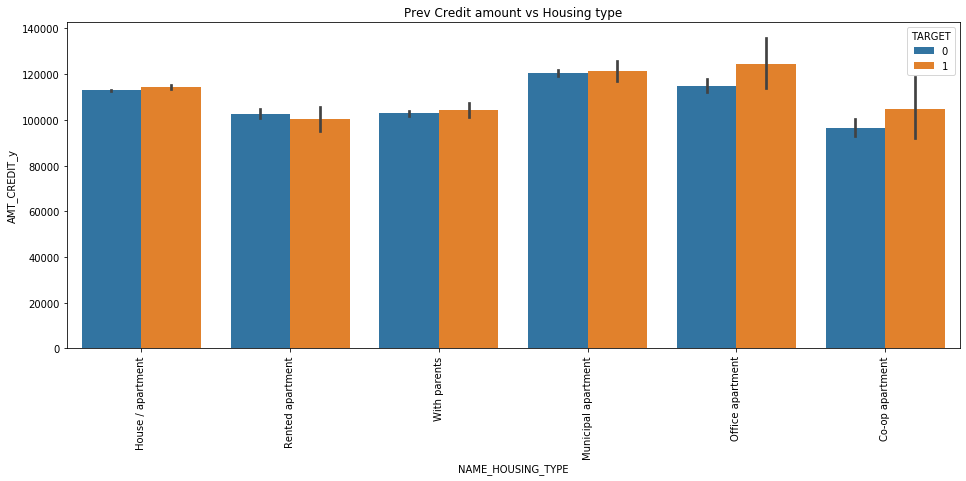

In [208]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
sns.barplot(data =final, y='AMT_CREDIT_y',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

<b>OBSERVATION 1:</b>
<p style="font-family: Arial; font-size:1.0em;color:blue;">
    Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.



In [209]:
final_out = final.loc[final['NAME_CONTRACT_STATUS']=='Approved', ['SK_ID_CURR','NAME_CONTRACT_STATUS']].groupby(['SK_ID_CURR']).count().reset_index()
final_out.rename(columns={'NAME_CONTRACT_STATUS': 'NUMBER_OF_APPROVED_LOANS'}, inplace = True)

In [210]:
final_out=pd.merge(final_out,application[['SK_ID_CURR','TARGET']],how='inner',on='SK_ID_CURR')
final_out=final_out[['SK_ID_CURR','NUMBER_OF_APPROVED_LOANS','TARGET']]
final_out.head()

,SK_ID_CURR,NUMBER_OF_APPROVED_LOANS,TARGET
0,100002,1,1
1,100003,1,0
2,100004,1,0
3,100006,4,0
4,100007,6,0


<p style="font-family: Arial; font-size:1.0em;color:blue;">Distribution of approved loans for the respective Target variables

In [211]:
final_out['TARGET'].value_counts(normalize=True)

0    0.914815
1    0.085185
Name: TARGET, dtype: float64

<p style="font-family: Arial; font-size:1.0em;color:blue;">There is huge amount of data imbalance in the 'TARGET' variable, leading to delusive results.<br>
Therefore, extracting a sample from the dataframe where 'TARGET' variable is balanced for the futher analysis.

In [212]:
final_out_target0=final_out.loc[final_out['TARGET']==0].sample(frac=0.094, random_state=1)

In [213]:
# Check the length of dataframe - containing 'TARGET' == 0
len(final_out_target0)

22166

In [214]:
# Check the length of dataframe - containing 'TARGET' == 1
len(final_out.loc[final_out['TARGET']==1])

21958

In [215]:
# Concat the two dataframes.
final_sampled=pd.concat([final_out_target0,final_out.loc[final_out['TARGET']==1]])

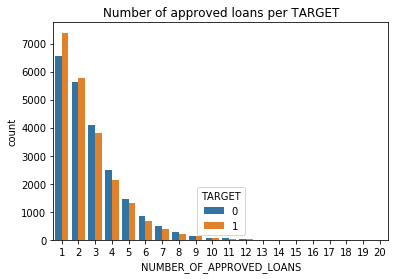

In [216]:
sns.countplot(x='NUMBER_OF_APPROVED_LOANS',hue='TARGET',data=final_sampled)
plt.title("Number of approved loans per TARGET")
plt.show()

<b>OBSERVATION 2:</b>
<p style="font-family: Arial; font-size:1.0em;color:blue;">
The above figure depicts the number of <b>APPROVED</b> loans for both the Target variables. For example, there are 6500 approved loans and 7500 approved loans for Target 0 and 1 respectively.<br>
There are more default cases for people with 1 and 2 approved loans when compared to non default cases. But, for customers with greater than or equal to 3 approved loans approved, the number of default cases are less when compared to default cases. <br>Therefore, for customers with more than 2 approved loans in the past, the preference can be given as 
it is very clearly evident from the plot that a<b> minimum of `3 approved loans`</b> from the previous applications represent a low default case.

In [217]:
final_out2=final.loc[final['NAME_CONTRACT_STATUS'] == 'Approved']
final_out2.head()

,SK_ID_CURR,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE,NAME_FAMILY_STATUS,AMT_CREDIT_x,AMT_GOODS_PRICE_x,AMT_ANNUITY_x,AMT_INCOME_TOTAL,TARGET,...,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_YIELD_GROUP,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL
0,100002,Working,House / apartment,Laborers,Single / not married,406597.5,351000.0,24700.5,202500.0,1,...,Approved,NaN,New,POS,Stone,low_normal,-565.0,125.0,-25.0,0.0
1,100003,State servant,House / apartment,Core staff,Married,1293502.5,1129500.0,35698.5,270000.0,0,...,Approved,Cash through the bank,Refreshed,POS,Country-wide,middle,-2310.0,-1980.0,-1980.0,1.0
2,100004,Working,House / apartment,Laborers,Single / not married,135000.0,135000.0,6750.0,67500.0,0,...,Approved,Cash through the bank,New,POS,Regional / Local,middle,-784.0,-694.0,-724.0,0.0
4,100006,Working,House / apartment,Laborers,Civil marriage,312682.5,297000.0,29686.5,135000.0,0,...,Approved,Cash through the bank,Repeater,POS,Country-wide,high,-281.0,49.0,NaN,0.0
5,100006,Working,House / apartment,Laborers,Civil marriage,312682.5,297000.0,29686.5,135000.0,0,...,Approved,NaN,Repeater,Cards,Credit and cash offices,NaN,NaN,NaN,NaN,0.0


In [218]:
# Drop the null values from 'NAME_YIELD_GROUP' column
final_out2.dropna(subset=['NAME_YIELD_GROUP'],inplace = True)
final_out2.head()

,SK_ID_CURR,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE,NAME_FAMILY_STATUS,AMT_CREDIT_x,AMT_GOODS_PRICE_x,AMT_ANNUITY_x,AMT_INCOME_TOTAL,TARGET,...,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_YIELD_GROUP,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL
0,100002,Working,House / apartment,Laborers,Single / not married,406597.5,351000.0,24700.5,202500.0,1,...,Approved,NaN,New,POS,Stone,low_normal,-565.0,125.0,-25.0,0.0
1,100003,State servant,House / apartment,Core staff,Married,1293502.5,1129500.0,35698.5,270000.0,0,...,Approved,Cash through the bank,Refreshed,POS,Country-wide,middle,-2310.0,-1980.0,-1980.0,1.0
2,100004,Working,House / apartment,Laborers,Single / not married,135000.0,135000.0,6750.0,67500.0,0,...,Approved,Cash through the bank,New,POS,Regional / Local,middle,-784.0,-694.0,-724.0,0.0
4,100006,Working,House / apartment,Laborers,Civil marriage,312682.5,297000.0,29686.5,135000.0,0,...,Approved,Cash through the bank,Repeater,POS,Country-wide,high,-281.0,49.0,NaN,0.0
6,100006,Working,House / apartment,Laborers,Civil marriage,312682.5,297000.0,29686.5,135000.0,0,...,Approved,Cash through the bank,Repeater,Cash,Credit and cash offices,high,NaN,NaN,NaN,NaN


In [219]:
final_out2['TARGET'].value_counts(normalize=True)

0    0.922074
1    0.077926
Name: TARGET, dtype: float64

In [220]:
# Lets's do the sampling again to derive meaningful results.
final_out2_target0=final_out2.loc[final_out2['TARGET']==0].sample(frac=0.085, random_state=1)

In [221]:
# Check the length of dataframe - containing 'TARGET' == 0
len(final_out2_target0)

50257

In [222]:
# Check the length of dataframe - containing 'TARGET' == 1
len(final_out2.loc[final_out2['TARGET']==1])

49968

In [223]:
# Concat the two dataframes.
final_sampled2=pd.concat([final_out2_target0,final_out2.loc[final_out2['TARGET']==1]])

In [224]:
final_sampled2.head()

,SK_ID_CURR,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE,NAME_FAMILY_STATUS,AMT_CREDIT_x,AMT_GOODS_PRICE_x,AMT_ANNUITY_x,AMT_INCOME_TOTAL,TARGET,...,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_YIELD_GROUP,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL
671345,309930,Working,House / apartment,Sales staff,Married,271957.5,252000.0,19471.5,180000.0,0,...,Approved,Cash through the bank,New,POS,Country-wide,low_normal,-2788.0,-2518.0,-2518.0,1.0
738336,330885,Working,House / apartment,NaN,Separated,900000.0,900000.0,38263.5,135000.0,0,...,Approved,Cash through the bank,Repeater,Cash,Credit and cash offices,middle,-883.0,-553.0,-793.0,1.0
731469,328849,Pensioner,House / apartment,NaN,Married,450000.0,450000.0,22500.0,157500.0,0,...,Approved,Cash through the bank,Repeater,Cash,Credit and cash offices,high,-904.0,-394.0,-394.0,1.0
254577,179633,Working,House / apartment,Sales staff,Married,891072.0,720000.0,42997.5,117000.0,0,...,Approved,NaN,Refreshed,POS,Stone,middle,-521.0,-191.0,-311.0,0.0
429088,234301,Working,House / apartment,Laborers,Married,297000.0,297000.0,16240.5,202500.0,0,...,Approved,Cash through the bank,Refreshed,POS,Country-wide,middle,-737.0,-47.0,-47.0,0.0


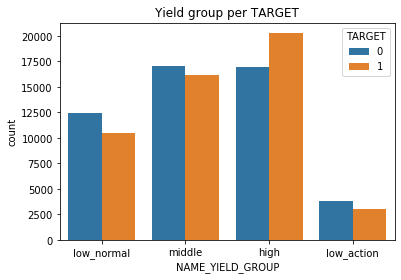

In [225]:
sns.countplot(x='NAME_YIELD_GROUP',hue='TARGET',data=final_sampled2)
plt.title("Yield group per TARGET")
plt.show()

<b>OBSERVATION 3:</b>
<p style="font-family: Arial; font-size:1.0em;color:blue;">
The above graph represents the number of customers in each interest rate group for both the target variables 0 and 1.<br>
Here, for all the interest rate groups except HIGH, the non default cases are more than that of default cases.<br>    
Therefore, <b>High</b> interest of the previous applications are more likely to default.

In [226]:
final_out3=final.loc[final['NAME_CONTRACT_STATUS'] == 'Approved']
final_out3.head()
# Drop the null values from 'CHANNEL_TYPE' column
final_out3.dropna(subset=['CHANNEL_TYPE'],inplace = True)
final_out3.head()

,SK_ID_CURR,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE,NAME_FAMILY_STATUS,AMT_CREDIT_x,AMT_GOODS_PRICE_x,AMT_ANNUITY_x,AMT_INCOME_TOTAL,TARGET,...,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_YIELD_GROUP,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL
0,100002,Working,House / apartment,Laborers,Single / not married,406597.5,351000.0,24700.5,202500.0,1,...,Approved,NaN,New,POS,Stone,low_normal,-565.0,125.0,-25.0,0.0
1,100003,State servant,House / apartment,Core staff,Married,1293502.5,1129500.0,35698.5,270000.0,0,...,Approved,Cash through the bank,Refreshed,POS,Country-wide,middle,-2310.0,-1980.0,-1980.0,1.0
2,100004,Working,House / apartment,Laborers,Single / not married,135000.0,135000.0,6750.0,67500.0,0,...,Approved,Cash through the bank,New,POS,Regional / Local,middle,-784.0,-694.0,-724.0,0.0
4,100006,Working,House / apartment,Laborers,Civil marriage,312682.5,297000.0,29686.5,135000.0,0,...,Approved,Cash through the bank,Repeater,POS,Country-wide,high,-281.0,49.0,NaN,0.0
5,100006,Working,House / apartment,Laborers,Civil marriage,312682.5,297000.0,29686.5,135000.0,0,...,Approved,NaN,Repeater,Cards,Credit and cash offices,NaN,NaN,NaN,NaN,0.0


In [227]:
final_out3['TARGET'].value_counts(normalize=True)

0    0.920467
1    0.079533
Name: TARGET, dtype: float64

In [228]:
# Lets's do the sampling again to derive meaningful results.
final_out3_target0=final_out3.loc[final_out3['TARGET']==0].sample(frac=0.087, random_state=1)

In [229]:
# Check the length of dataframe - containing 'TARGET' == 0
len(final_out3_target0)

57018

In [230]:
# Check the length of dataframe - containing 'TARGET' == 1
len(final_out3.loc[final_out3['TARGET']==1])

56628

In [231]:
# Concat the two dataframes.
final_sampled3=pd.concat([final_out3_target0,final_out3.loc[final_out3['TARGET']==1]])

In [232]:
final_sampled3.head()

,SK_ID_CURR,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE,NAME_FAMILY_STATUS,AMT_CREDIT_x,AMT_GOODS_PRICE_x,AMT_ANNUITY_x,AMT_INCOME_TOTAL,TARGET,...,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_YIELD_GROUP,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL
568626,278139,Working,House / apartment,Security staff,Single / not married,126000.0,126000.0,7362.0,90000.0,0,...,Approved,Cash through the bank,New,POS,Country-wide,high,-2188.0,-2038.0,-2038.0,1.0
665538,308117,Commercial associate,House / apartment,Laborers,Civil marriage,1078200.0,900000.0,34911.0,202500.0,0,...,Approved,NaN,Refreshed,Cash,Contact center,low_normal,NaN,NaN,NaN,NaN
965685,400042,Working,House / apartment,Laborers,Married,808650.0,675000.0,26086.5,126000.0,0,...,Approved,Cash through the bank,Repeater,Cash,Credit and cash offices,high,-824.0,-314.0,-764.0,1.0
464661,245429,Working,House / apartment,Laborers,Single / not married,545040.0,450000.0,39627.0,135000.0,0,...,Approved,Cash through the bank,New,POS,Stone,middle,-807.0,-657.0,-687.0,0.0
867973,371009,Working,House / apartment,Waiters/barmen staff,Civil marriage,180000.0,180000.0,9000.0,135000.0,0,...,Approved,Cash through the bank,Refreshed,POS,Country-wide,middle,-49.0,281.0,NaN,0.0


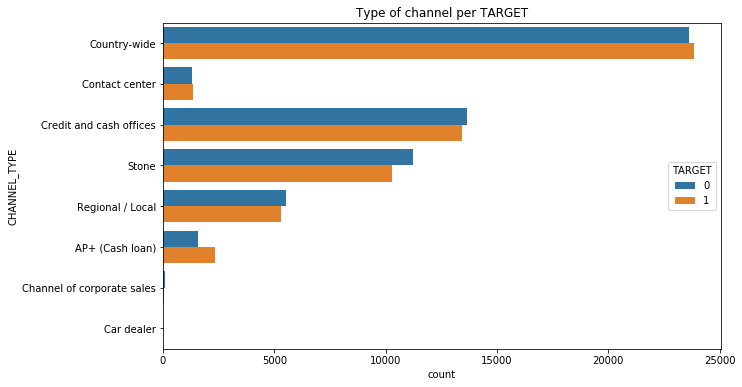

In [233]:
plt.figure(figsize=(10,6))
sns.countplot(y='CHANNEL_TYPE',hue='TARGET',data=final_sampled3)
plt.title("Type of channel per TARGET")
plt.show()

<b>OBSERVATION 4:</b>
<p style="font-family: Arial; font-size:1.0em;color:blue;">
    The above plot represents the Channel type for all the approved loans for both the Target variables.<br>
The channel types (i.e., through which channel we acquired the client on the previous application) that are leading to more loan default cases are<br>
1. Country-wide<br>
2. AP+(Cash loan)